In [1]:
from common_code.common import *
from common_code.plotting import *

from Trainers.DatasetQA import *
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from random import shuffle

In [2]:
dataset = 'qqp'

base = 'experiments/GLUE/'

base_dir1 = base+dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0'
base_dir2 = base+dataset+'_ortho_lstm_tanh/'+dataset.upper()+'/ortho_lstm+tanh'
base_dir3 = base +dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0.5'


if 'attn_pngs' not in os.listdir(base):
    os.mkdir(base+'attn_pngs')
        
path_to_png = base + 'attn_pngs/'.format(dataset, dataset)
path_to_csv = base + 'form_data.tsv'.format(dataset, dataset)


In [3]:
dataset = datasets[dataset]()

def process_grads(grads, X) :
    for k in grads :
        if (k != "conicity") and (k != "X"):
            xxe = grads[k]
            for i in range(len(xxe)) :
                L = len(X[i])
                xxe[i] = np.abs(xxe[i])
                xxe[i] = xxe[i] / np.sum(xxe[i][1:L-1])

def get_outputs(base_dir):    
    dirname = get_latest_model(base_dir)
    outputs = pload1(dirname,'test_output')
#     outputs['cd_attn'] = pload1(dirname,'cd')
#     outputs['cd_matrix'] = pload1(dirname,'cd_matrix')
#     pred = np.argmax(outputs['yt_hat'],axis=1).squeeze()
#     yt_pred= np.zeros_like(prob)
#     yt_pred[prob>0.5] = 1
#     outputs['yt_pred'] = pred
    return outputs

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
print(path_to_csv)

experiments/GLUE/form_data.tsv


In [5]:
def print_attention_2(output1, output2, output3, output_filter=0, plot=True, jsd_thresh=0.3, max=10, crop=True):
    
#     if(output_filter == 'pos'):
#         path_to_png = path_to_png_pos
#         path_to_csv = path_to_csv_pos
#     else:
#         path_to_png = path_to_png_neg
#         path_to_csv = path_to_csv_neg

    #shuffles outputs
#     shuffle_in_unison(output1)
#     shuffle_in_unison(output2)
    
        
    op = output_filter
    fi = open(path_to_csv, 'w')
    count = 0
    
    for idx in range(len(output1['attn_hat'])):
        
        attn1 = output1['attn_hat'][idx]
        attn2 = output2['attn_hat'][idx]
        attn3 = output3['attn_hat'][idx]
        
        L = len(output1['P'][idx])
        js_divergence = jsd(attn1[1:L-1],attn3[1:L-1])

        if (js_divergence <= jsd_thresh):
            
            y_pred1 = output1['yt_hat'][idx]
            y_pred2 = output2['yt_hat'][idx]
            y_pred3 = output3['yt_hat'][idx]
            
            y = output1['y'][idx]


            sentence = dataset.vec.map2words(output1['P'][idx])  
            question = dataset.vec.map2words(output1['Q'][idx])  
            
            l_q = len(question)
            question = " ".join(question[1:l_q-1])
            

            L = len(sentence)
            
            if ( y == op and y == y_pred1 and y== y_pred3):
            
                if( max != -1 and count == max):
                    break
                    
                count += 1
            
                if(plot):
                    # write to file

                    fi.write(str(y)+'\t')
                    fi.write(question+'\n')

                    #plot figures
                    png_path = path_to_png + "example{}.png".format(count)
                    
                    print(question)
                    print(L)

                    print_attn(sentence[1:L-1], attn1[1:L-1])
                    print_attn(sentence[1:L-1], attn3[1:L-1])

                    if(len(sentence[1:L-1]) <= 12):
                        kws = {"rotation": 0, "size": 10}
                    else:
                        kws = {"rotation": 45, "size": 15}

                    fig, ax = init_gridspec(10, 1, 2)
                    attn_matirx = np.array(attn1[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[0].set_ylabel('')    
                    ax[0].set_xlabel('')

                    ax[0] = plot_attention(ax[0], attn_matirx, annotate, kws)

                    attn_matirx = np.array(attn3[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[1] = plot_attention(ax[1], attn_matirx, annotate, kws)

                    show_gridspec()
                    fig.savefig(png_path)
                    
                    print ("-"*30)
                    sys.stdout.flush()
                    
                    
    if(plot and crop):
        #crop pngs to remove whitespace
        print("Cropping saved pngs")

        for l in os.listdir(path_to_png):
            if(l == '.DS_Store'):
                continue
            crop_img(path_to_png+l)

        print("Done cropping")
            
    return count

Can you see who views your Instagram stories ?
6


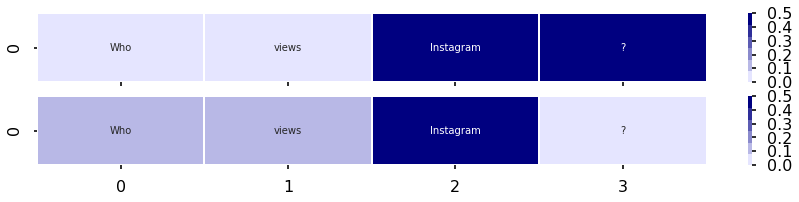

------------------------------
How can I improve my study efficiency ?
6


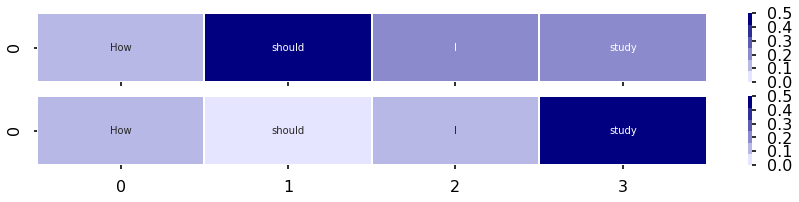

------------------------------
Did dinosaurs really exist ?
6


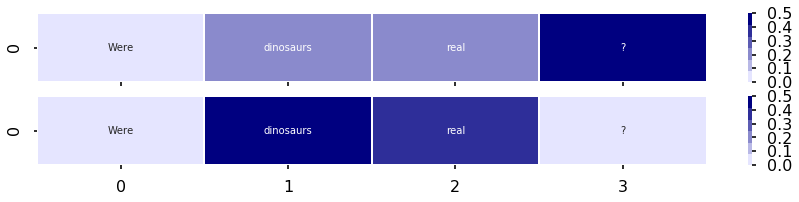

------------------------------
How can I study efficiently ?
6


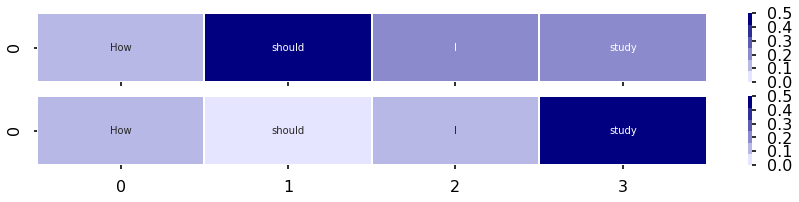

------------------------------
What are the causes of obesity ?
6


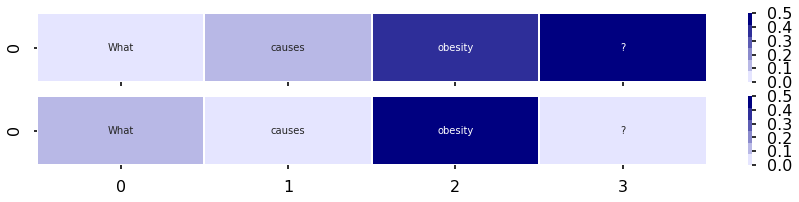

------------------------------
Who in the Earth named Earth ?
6


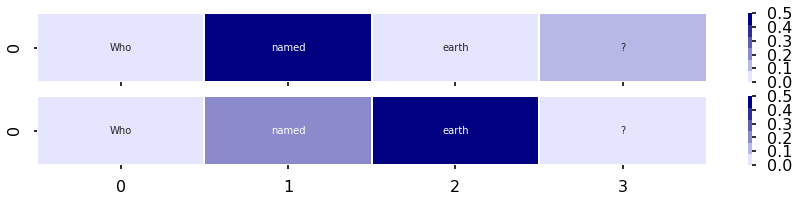

------------------------------
`` What does `` '' Quora `` '' mean ? ''
6


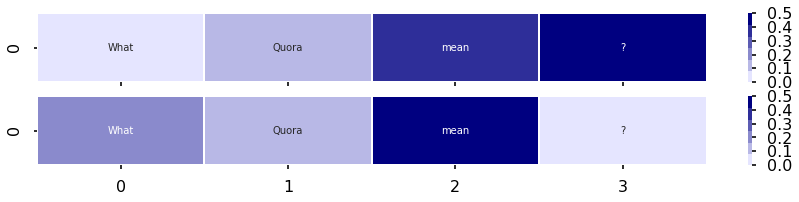

------------------------------
Why are women so complicated ?
7


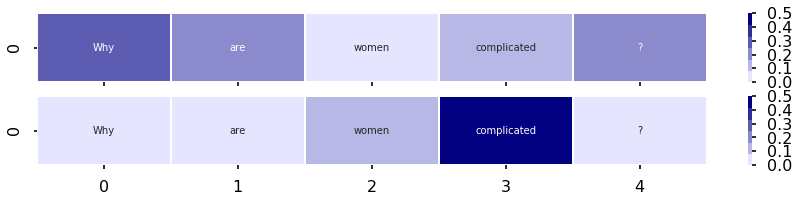

------------------------------
How would you explain game theory ?
7


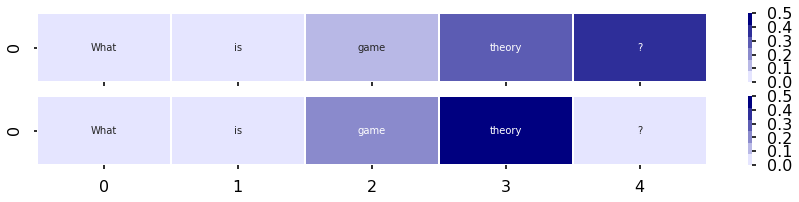

------------------------------
Does perfection really exist ?
7


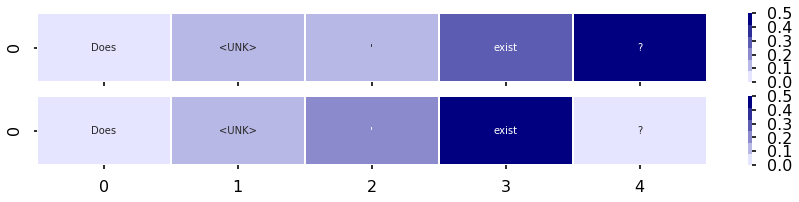

------------------------------
Why do some people consider Donald Trump Jam racist ?
7


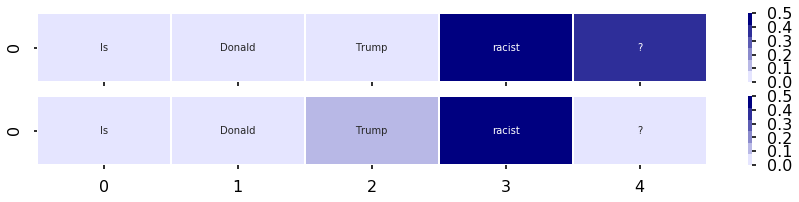

------------------------------
Why does sleep paralysis happens ?
7


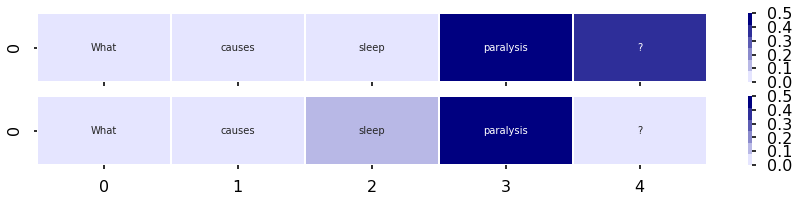

------------------------------
How is a rainbow formed ?
7


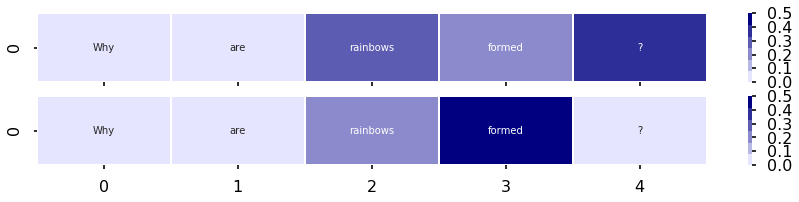

------------------------------
What is ink made from ? How is it made ?
7


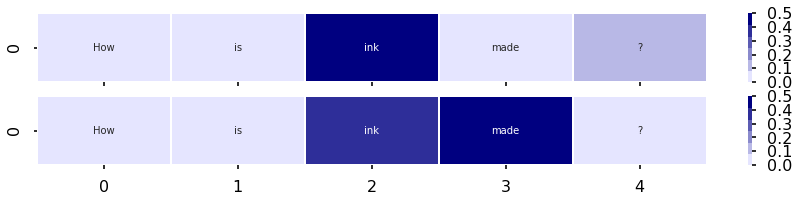

------------------------------
Will china attack India ?
7


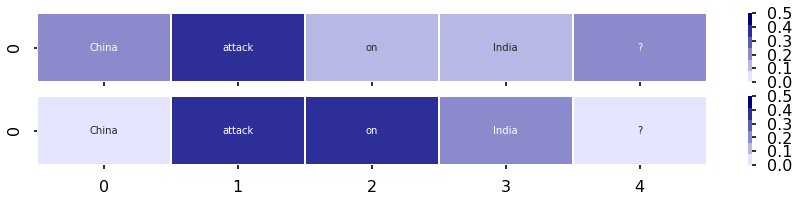

------------------------------
Should zoos exist anymore ?
7


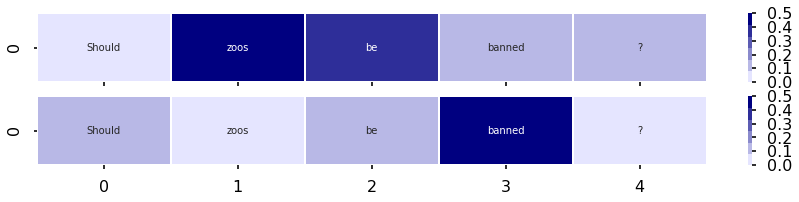

------------------------------
What makes a person creative ? Are n't we all creative ?
7


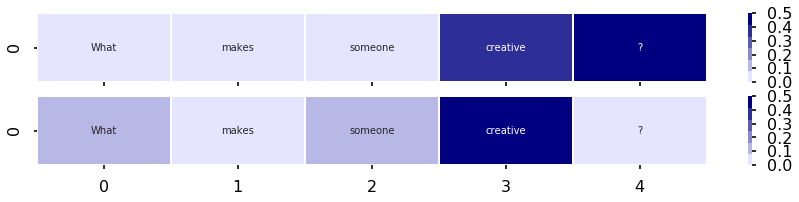

------------------------------
Can I hack Wi-Fi ?
7


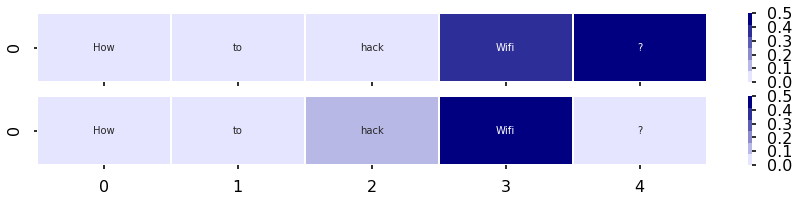

------------------------------
How can I start making money ? What are the best ways to make money ?
7


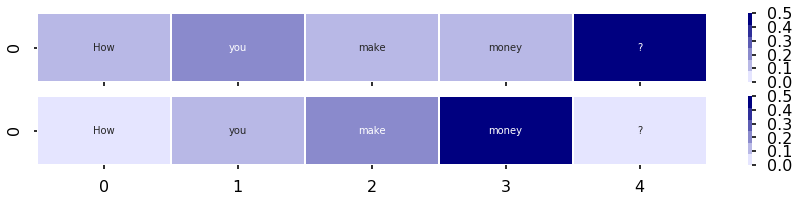

------------------------------
Can god make mistakes ?
7


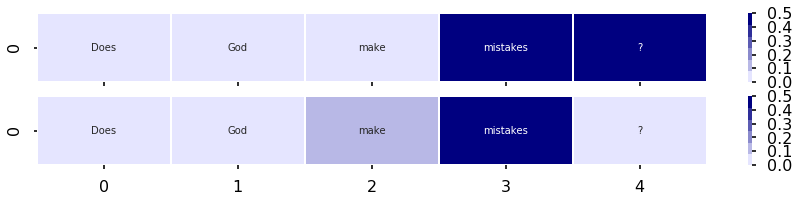

------------------------------
What 's real love ?
7


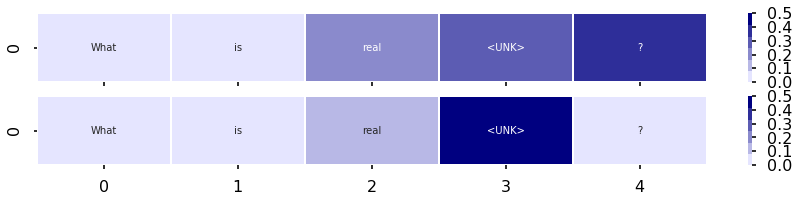

------------------------------
What is the ionic bond ?
7


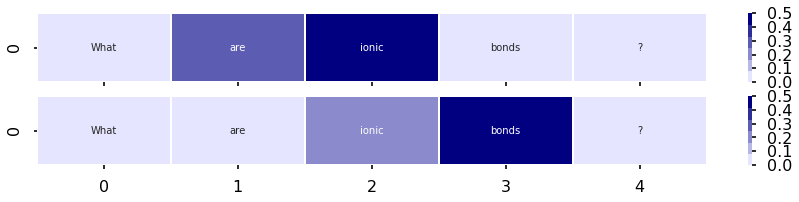

------------------------------
How can we hack Wifi <UNK> ?
7


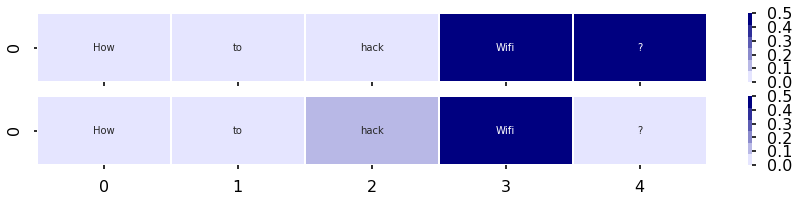

------------------------------
Does Donald Trump still have a chance of winning ?
7


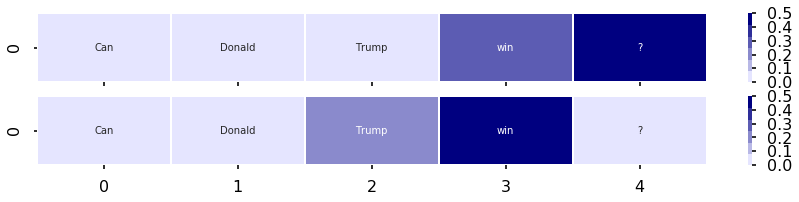

------------------------------
What is the Kashmir conflict ?
7


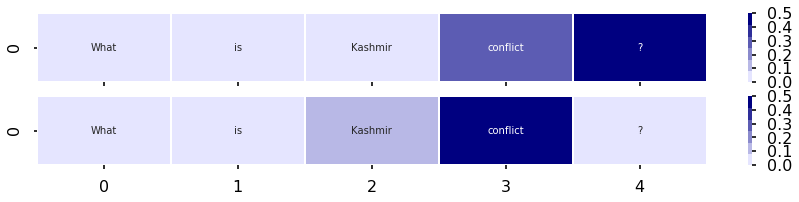

------------------------------
What are some ways to understand game theory ?
7


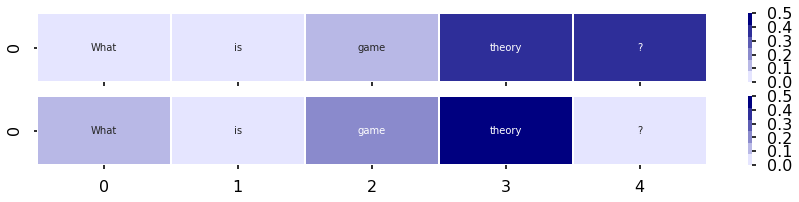

------------------------------
Is Baron Trump autistic ?
7


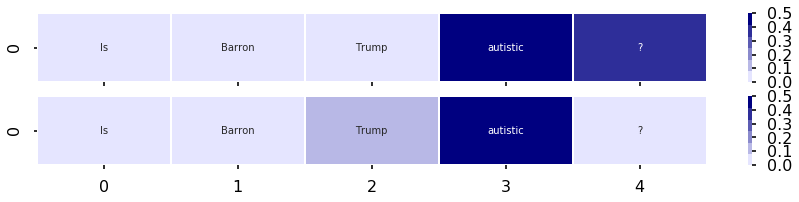

------------------------------
What is the beauty ?
7


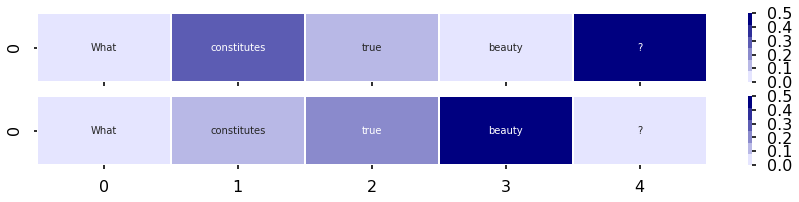

------------------------------
What are whey proteins ?
7


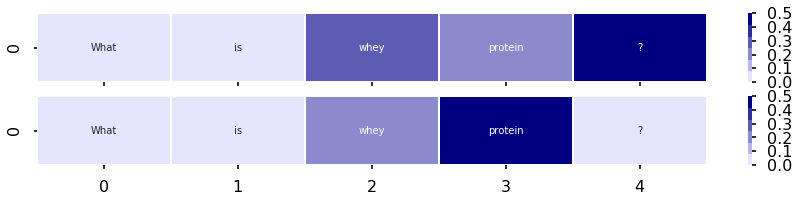

------------------------------
How are the hurricanes named ?
7


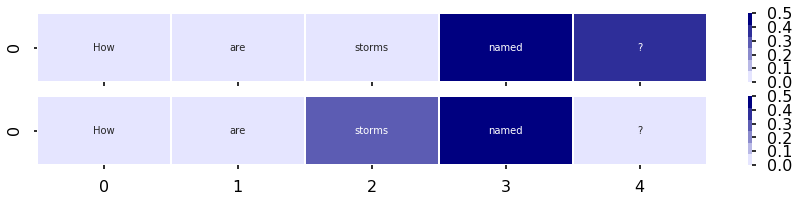

------------------------------
Who invented the light year ?
7


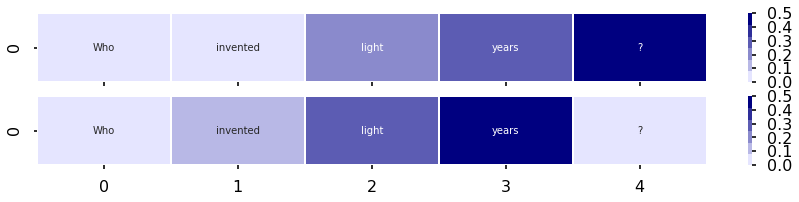

------------------------------
Is incest that bad ?
7


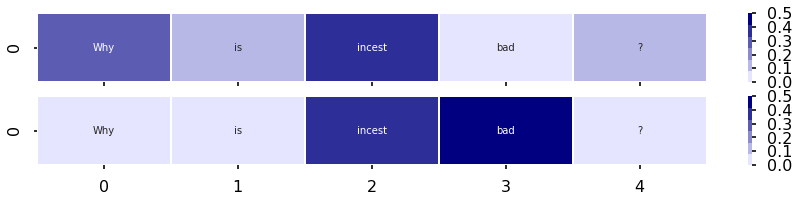

------------------------------
Is universe expanding or not ?
7


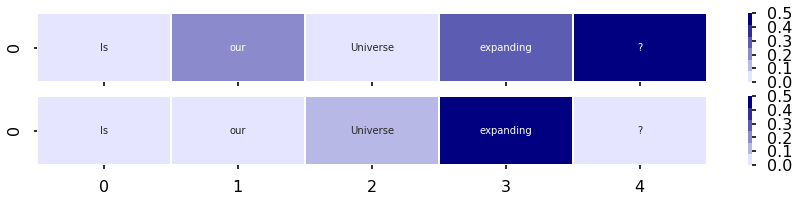

------------------------------
Is there any extraterrestrial intelligent life ?
7


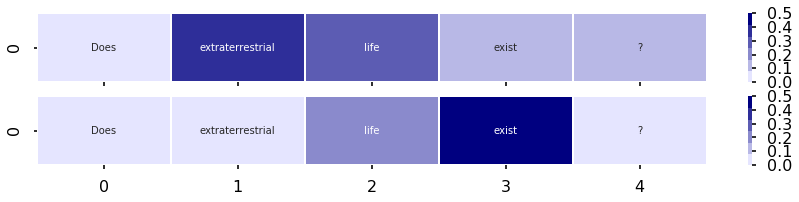

------------------------------
What are the proofs of scientists that the universe is expanding ?
7


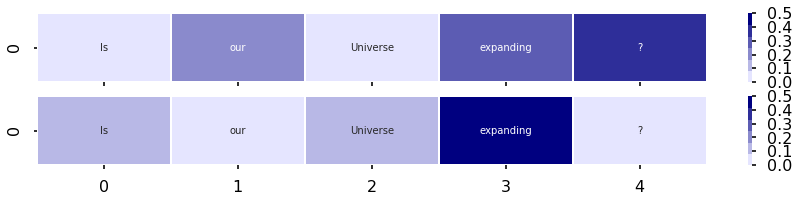

------------------------------
What is genetic drift ? What are some types ?
7


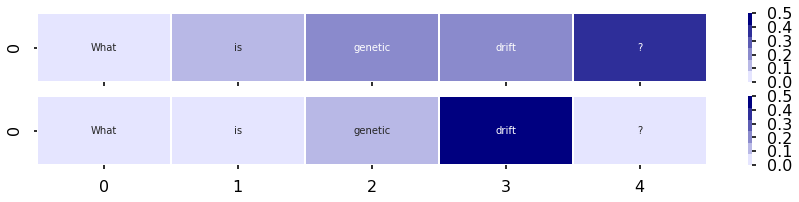

------------------------------
What is the meaning of covalent bond ?
7


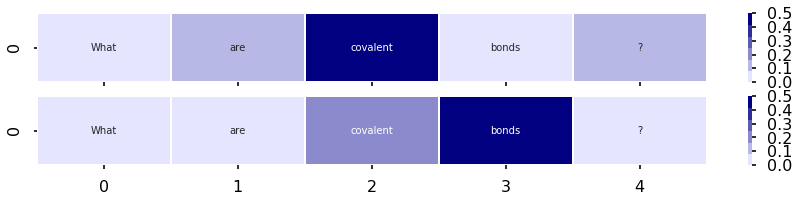

------------------------------
Should psychiatry be <UNK> and/or abolished ?
7


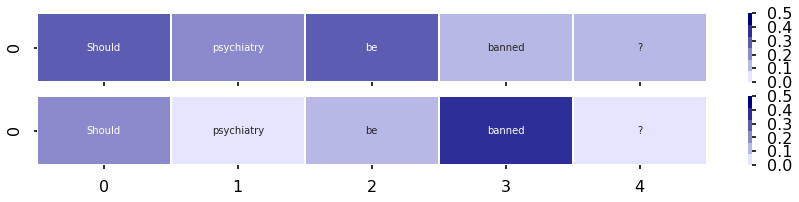

------------------------------
Which country is the best country ?
7


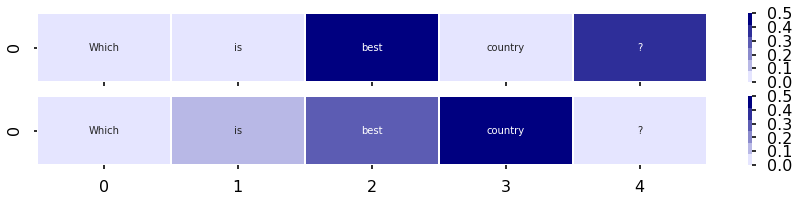

------------------------------
Is India a democracy or a republic ?
7


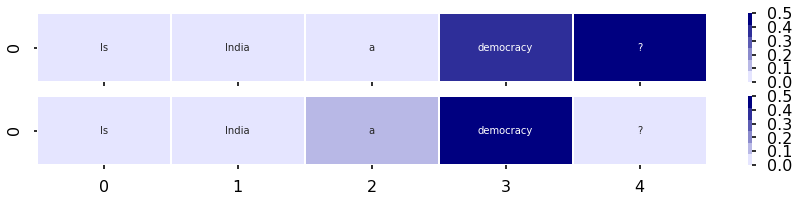

------------------------------
Why does the Bible have a copyright in it ?
7


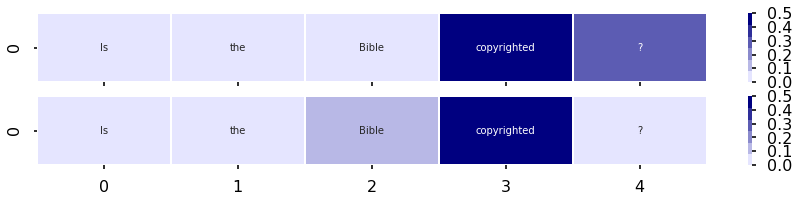

------------------------------
What is origin of gravity ?
7


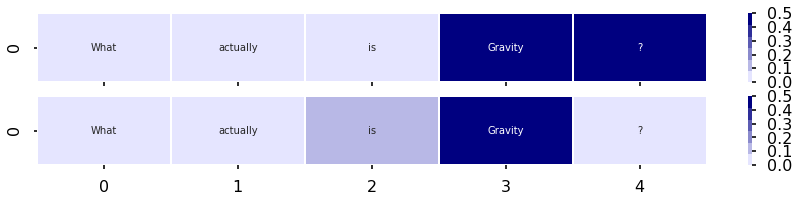

------------------------------
What are some hacking tools ?
7


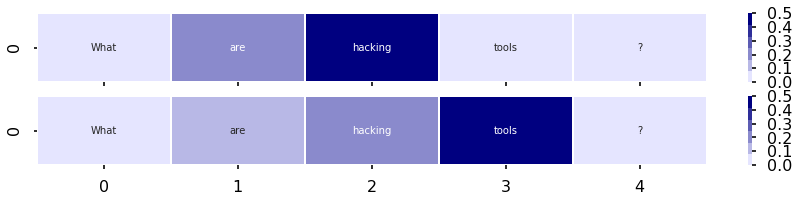

------------------------------
What is psychology ?
7


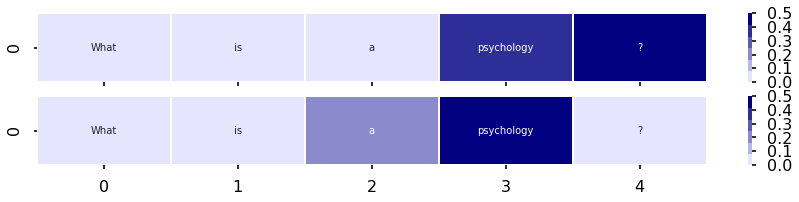

------------------------------
What is geographic tongue ? Does it hurt ?
7


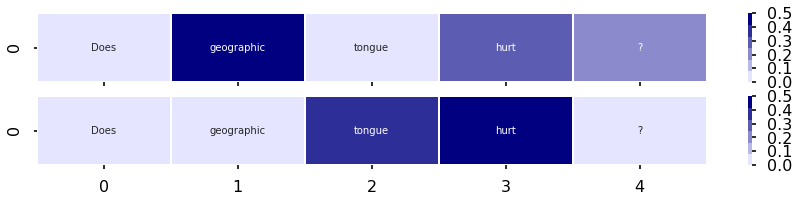

------------------------------
Is sex addiction a reality ?
7


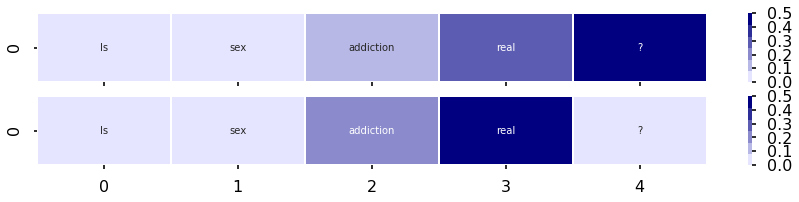

------------------------------
Can hamsters eat raisins ? If so , how harmful are they for them in any way ?
7


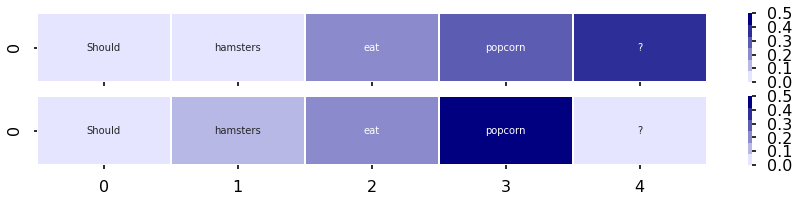

------------------------------
Why is negative freedom important ?
7


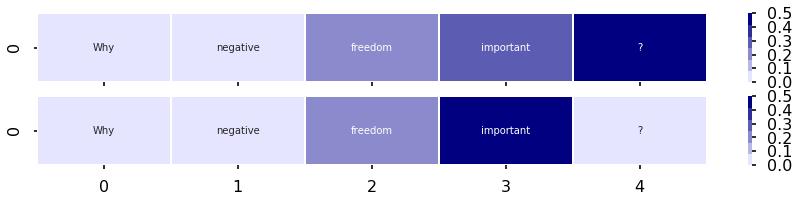

------------------------------
What exactly is behavioral economics ?
7


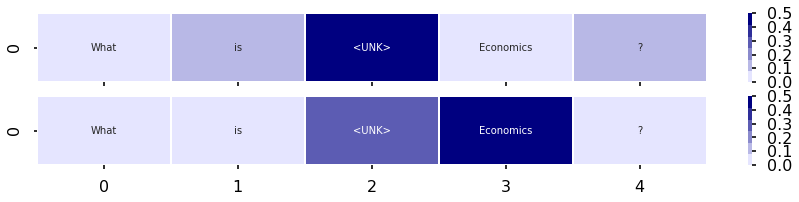

------------------------------
Can hamsters eat cheese ?
7


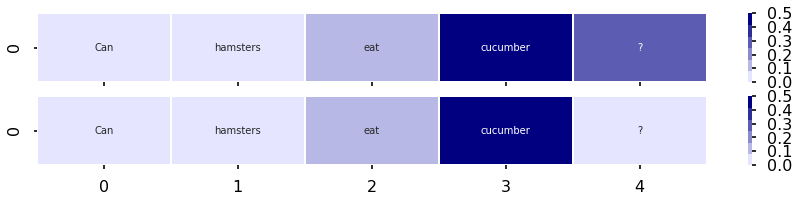

------------------------------
How bad is having herpes ?
7


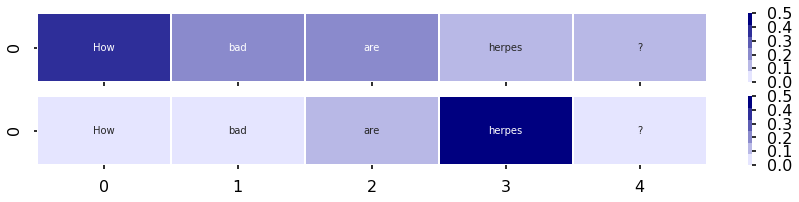

------------------------------
Why does n't honey go bad ?
7


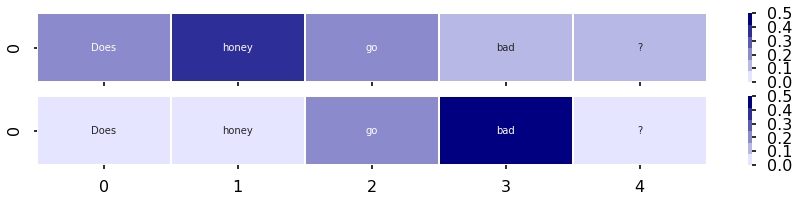

------------------------------
How nerdy are MIT students ?
7


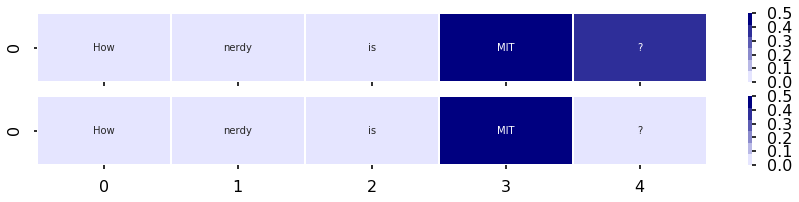

------------------------------
What are the best <UNK> loans to acquire ?
7


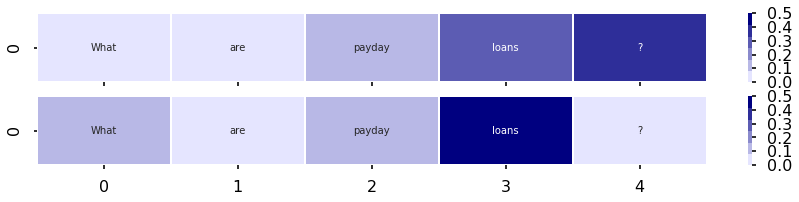

------------------------------
How bad is masturbation and what are the bad effects ?
7


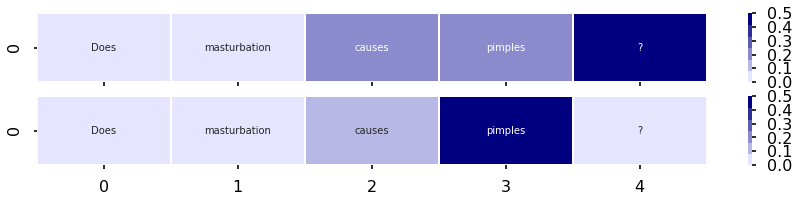

------------------------------
Does school kills creativity ?
7


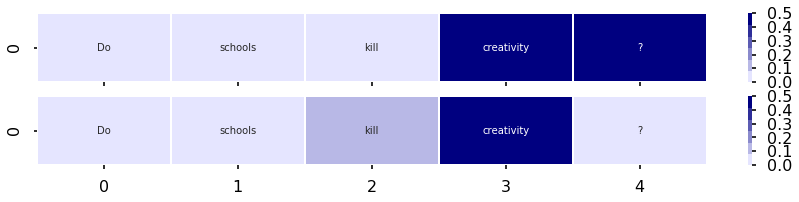

------------------------------
How Islam spread around the world ?
7


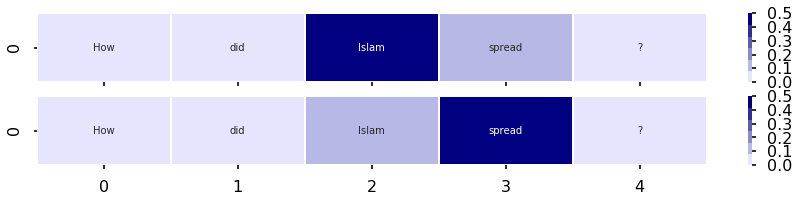

------------------------------
Can a dog have liquid Benadryl ?
7


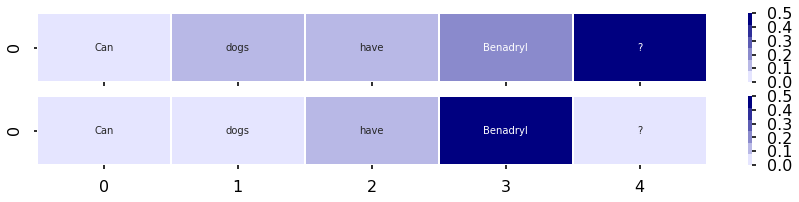

------------------------------
Dose astrology really work ?
7


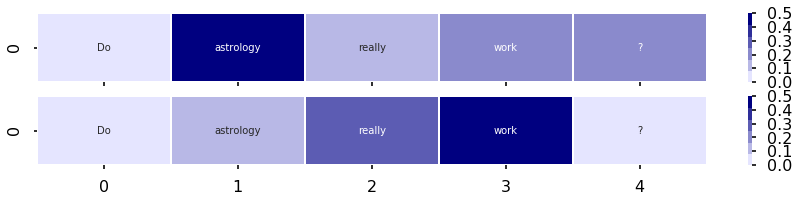

------------------------------
What is market force ?
7


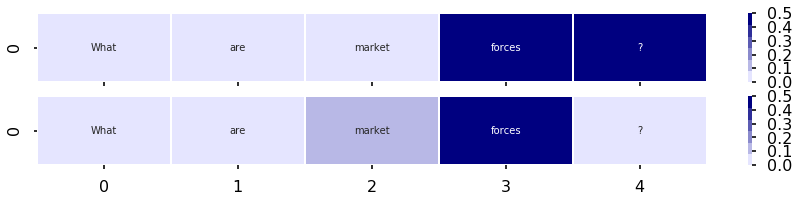

------------------------------
`` What was there before the `` '' beginning '' '' ? ''
7


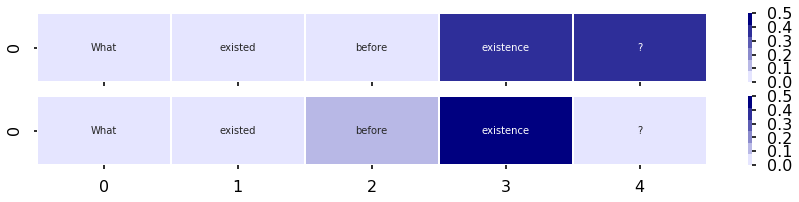

------------------------------
What is music theory exactly ?
7


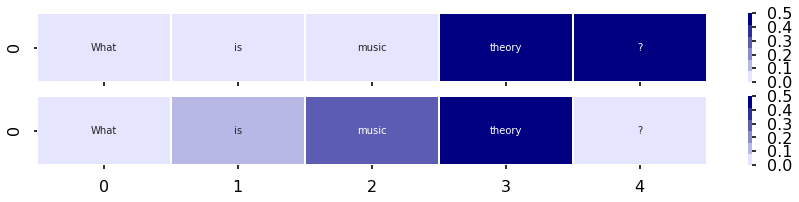

------------------------------
What is periodic function ?
7


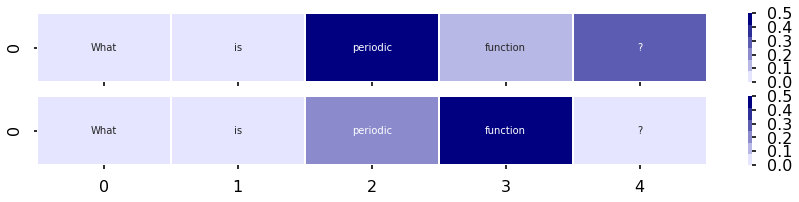

------------------------------
Who are angel investors , and where can I find them ?
7


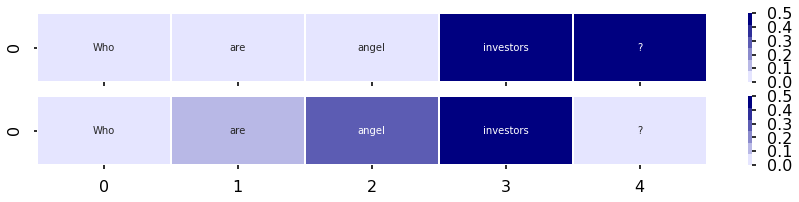

------------------------------
What is algebra and why is it important ?
7


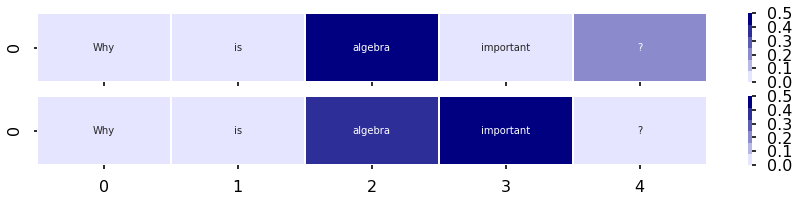

------------------------------
Does school always kill creativity ?
7


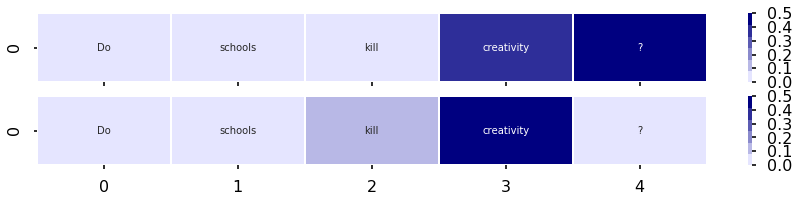

------------------------------
How can smoking marijuana give you lung cancer ?
7


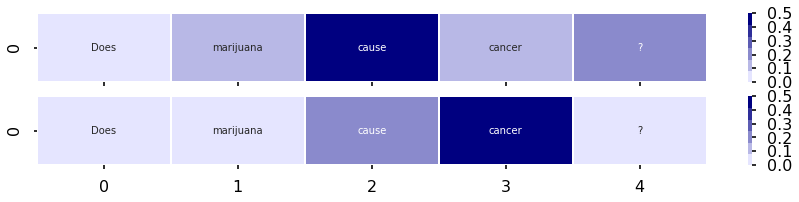

------------------------------
How do I grow shorter ?
7


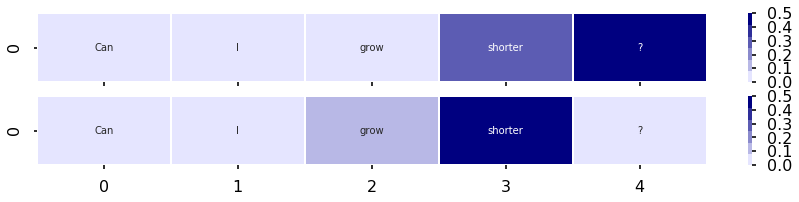

------------------------------
Why is <UNK> <UNK> painful ?
7


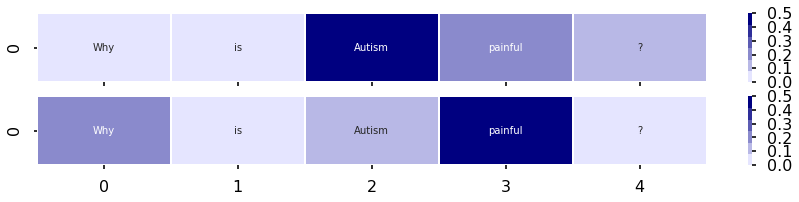

------------------------------
Why is China helping Pakistan ?
7


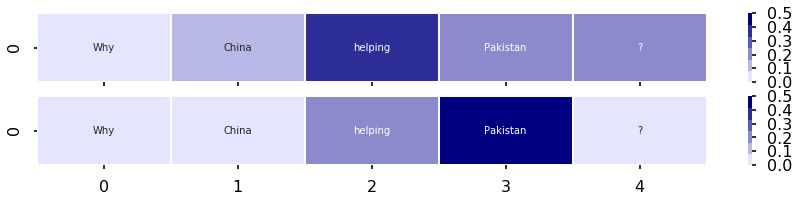

------------------------------
Does Quora stand for <UNK> OR Answer ?
7


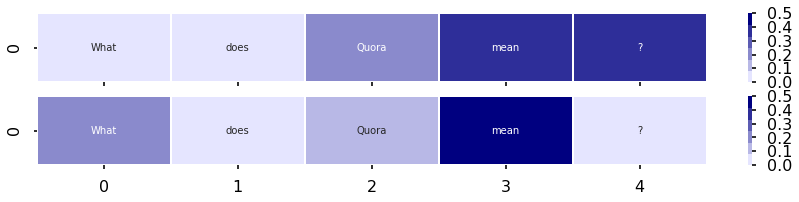

------------------------------
What is the meaning of time dilation ?
7


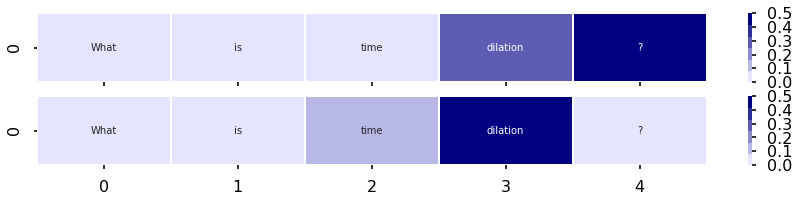

------------------------------
What are the benefits of PPF account in India ?
7


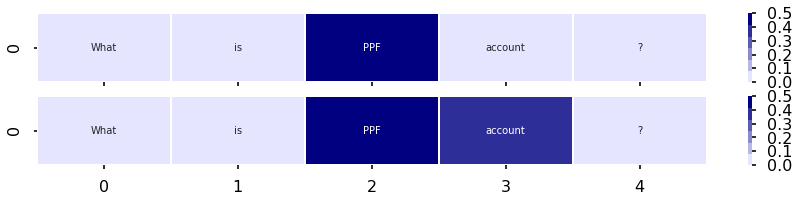

------------------------------
Is demonetization a failed move ?
7


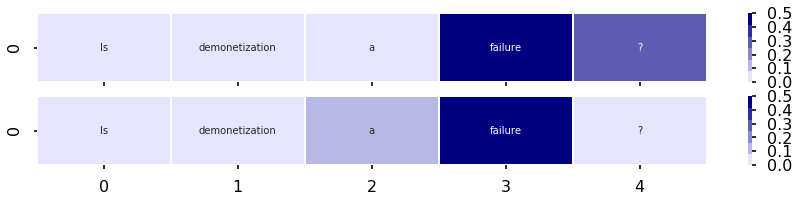

------------------------------
Can hamsters eat grapes ?
7


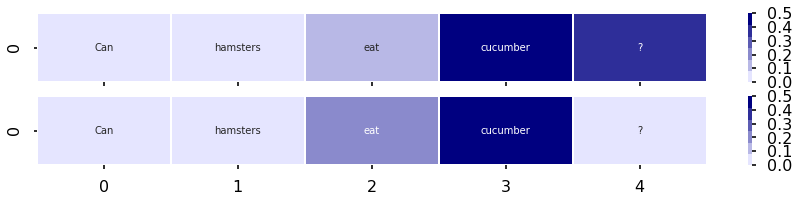

------------------------------
Should hamsters eat popcorn ?
7


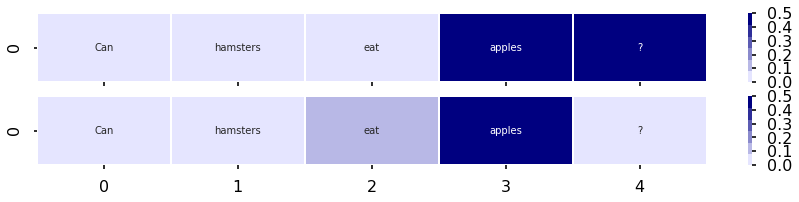

------------------------------
How does whatsapp works ?
7


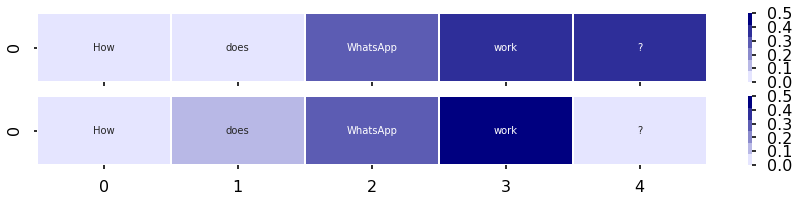

------------------------------
Is there an explanation to why yawning is infectious ?
7


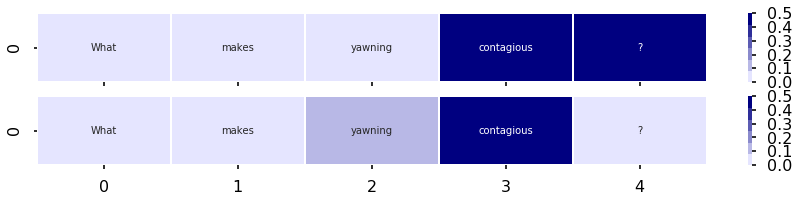

------------------------------
Is it possible that Don Trump is insane ?
7


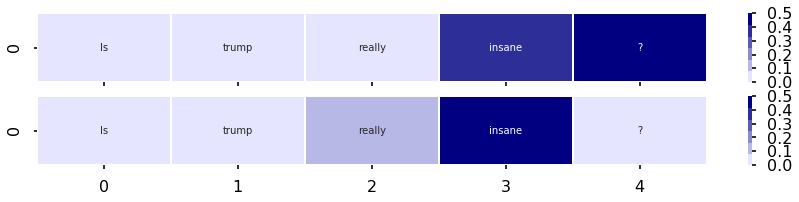

------------------------------
How is light created ?
7


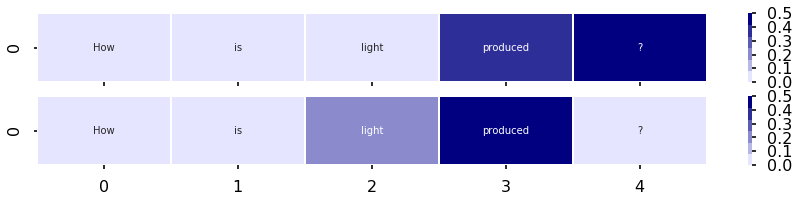

------------------------------
Are the US elections rigged ?
7


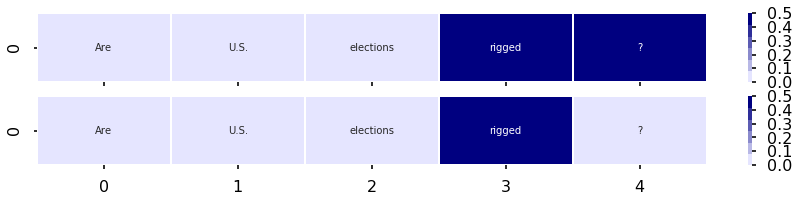

------------------------------
Is <UNK> actually good or is it bad ?
7


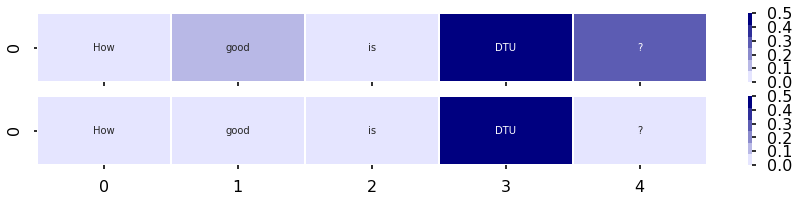

------------------------------
Why Higher Education is important for students ?
7


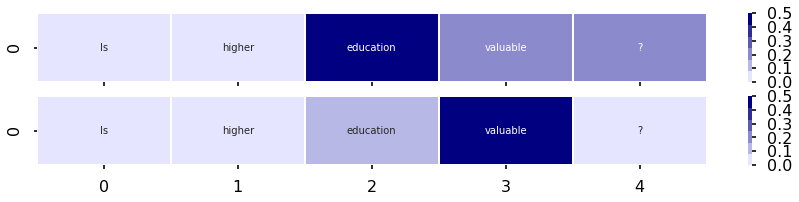

------------------------------
Does education kills creativity ?
7


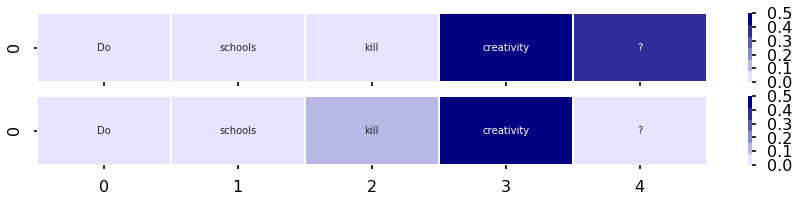

------------------------------
What is the standard deviation ? Why is it used ?
7


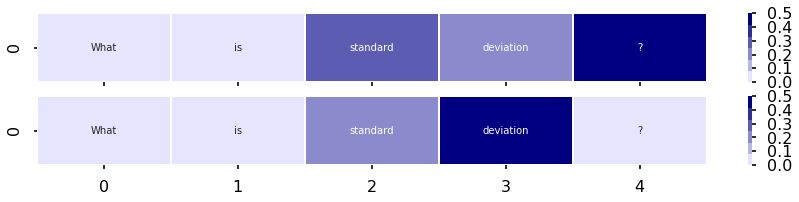

------------------------------
What is the best way to make money make more money ?
7


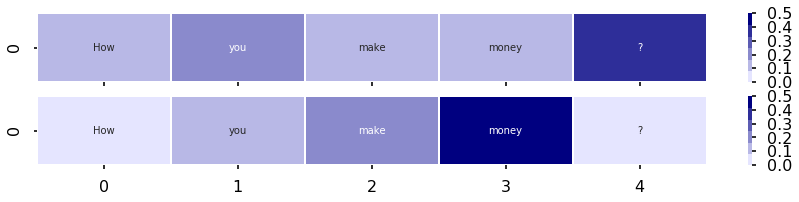

------------------------------
What are the main causes of nightmares ?
7


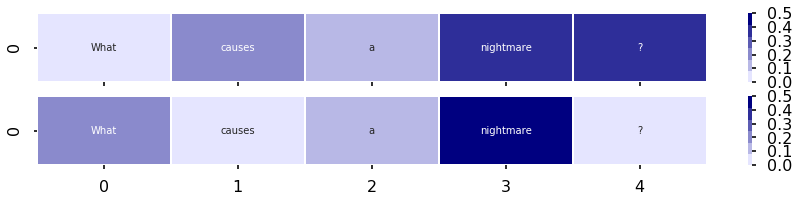

------------------------------
From where did humans come ?
7


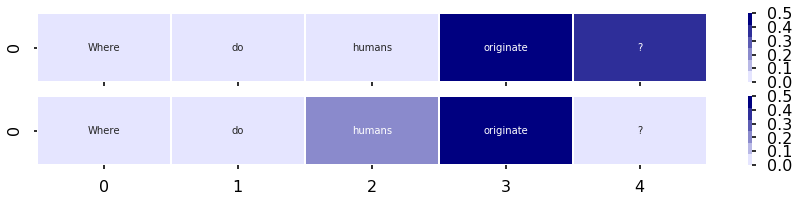

------------------------------
Do twin flames really exist ?
7


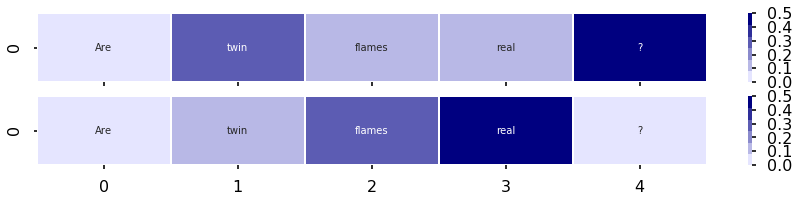

------------------------------
Who is the great master astrologer in India ?
7


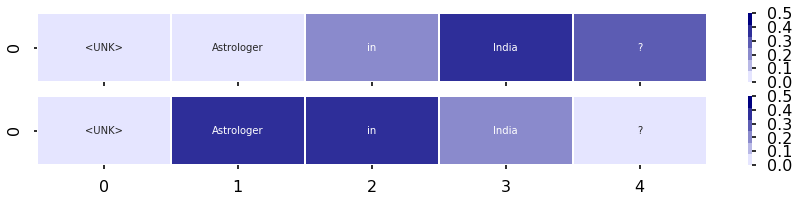

------------------------------
What is a diplomat ?
7


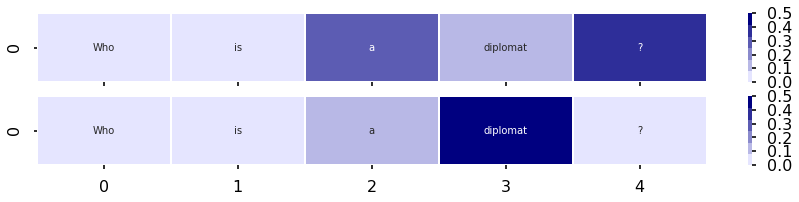

------------------------------
<UNK> is good or not ?
7


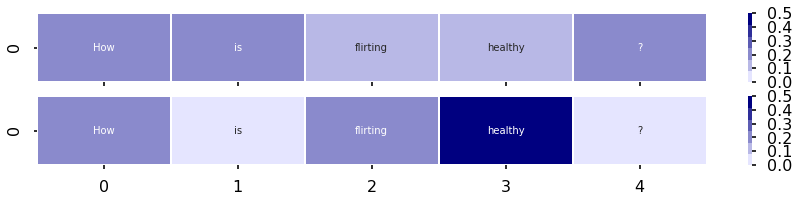

------------------------------
What is digital marketing ? What are the basics of Digital Marketing ? What is digital marketing strategy ? Who needs digital marketing services ?
8


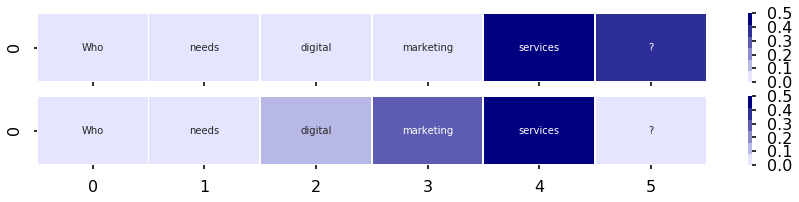

------------------------------
Rich people of Quora , what should I do to become rich ?
8


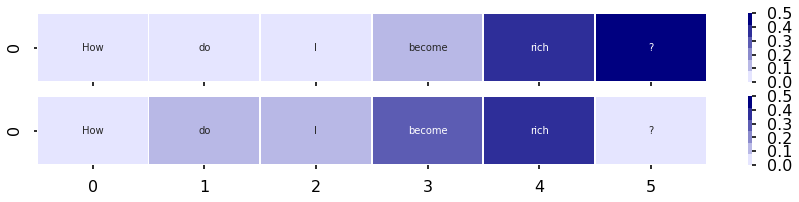

------------------------------
What do you mean by open market operation ?
8


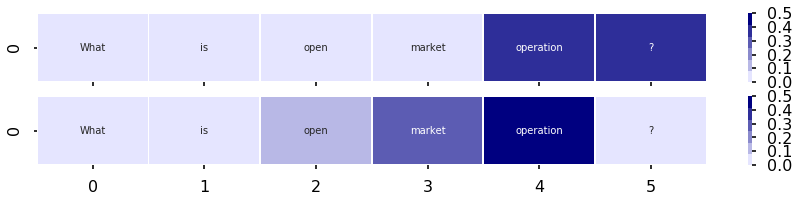

------------------------------
How can I have a successful long distance relationship ?
8


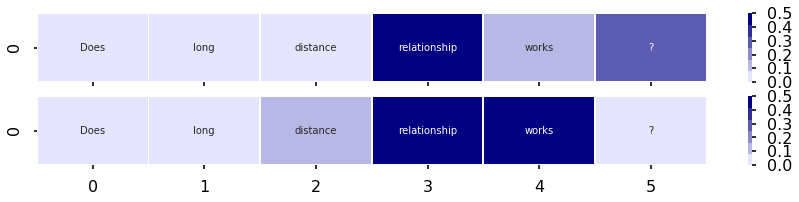

------------------------------
Is it possible to travel time with real life ?
8


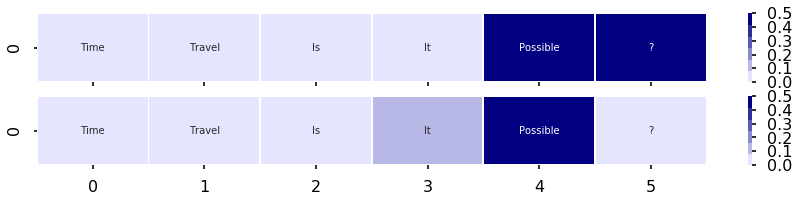

------------------------------
What 's your favourite anime ? And why ?
8


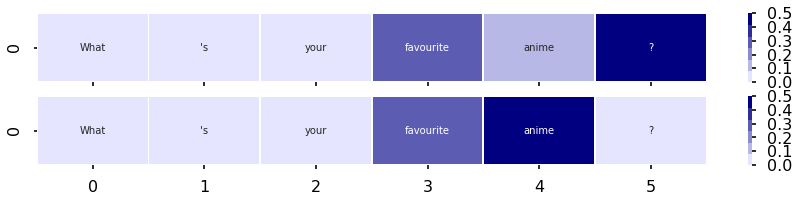

------------------------------
Why did some Quora answers collapse ?
8


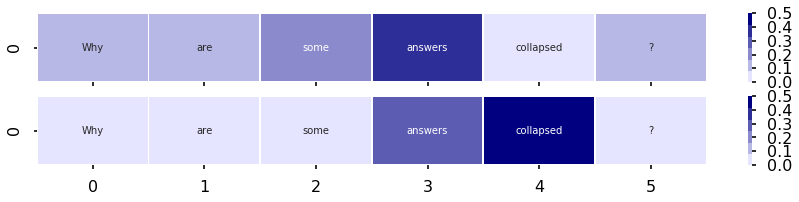

------------------------------
How could I become mature and have a stable mind ?
8


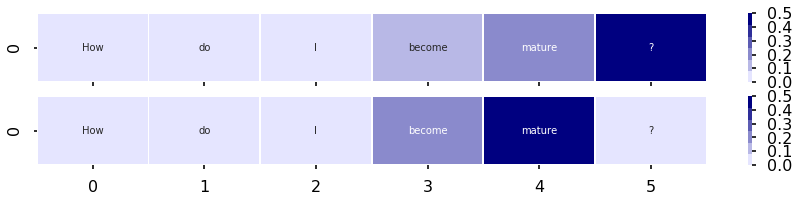

------------------------------
What is logic gate ?
8


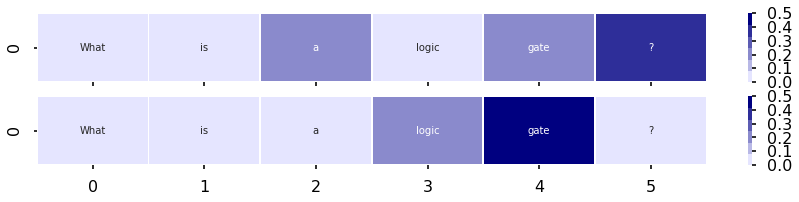

------------------------------
How do people deal with boredom ?
8


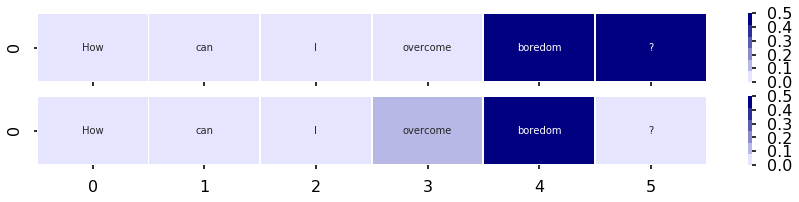

------------------------------
How can I lose 10 Kilos ?
8


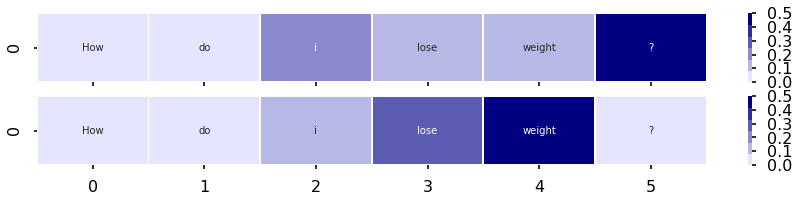

------------------------------
How does the brain works ?
8


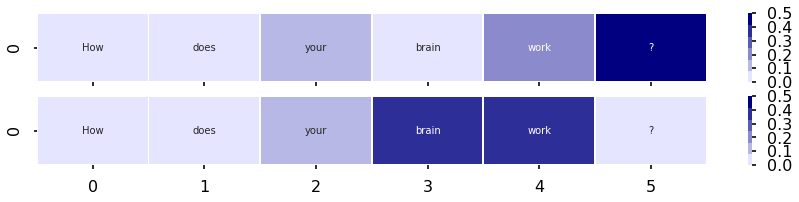

------------------------------
What are some tips about learning math ?
8


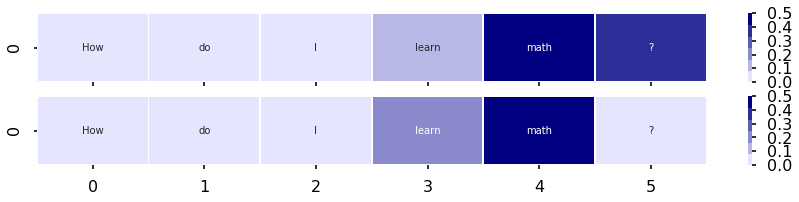

------------------------------
What is the purpose of life , if not money ?
8


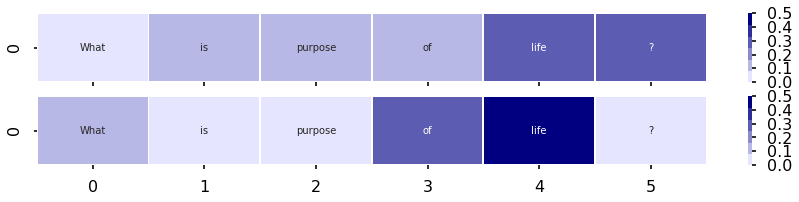

------------------------------
How many dimensions are there in universe and name them ?
8


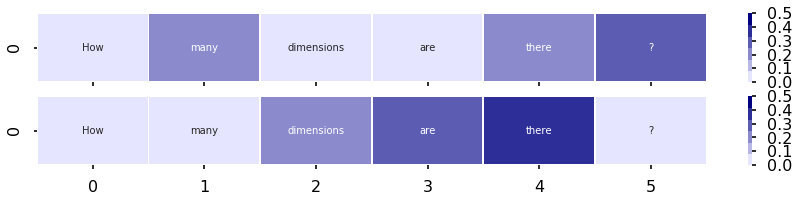

------------------------------
How can stop <UNK> for man ?
8


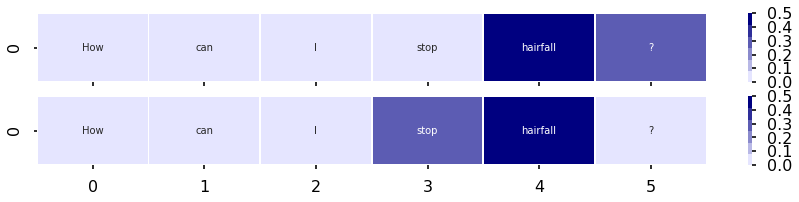

------------------------------
What exactly is the String Theory ?
8


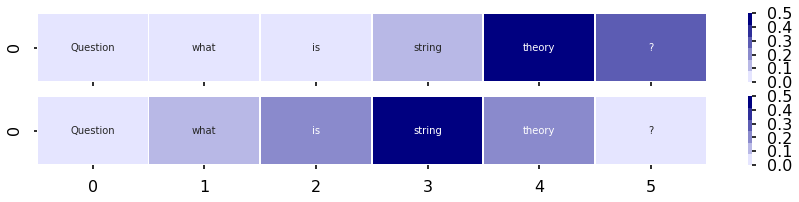

------------------------------
What are some tricks to study effectively ?
8


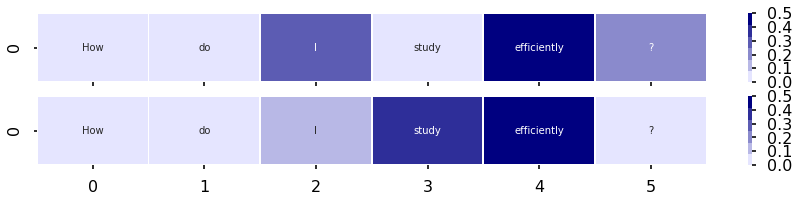

------------------------------
How do I learn Mandarin Chinese well ?
8


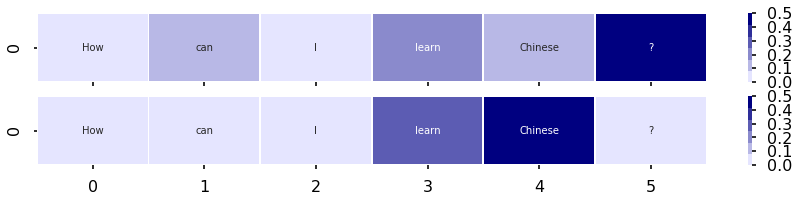

------------------------------
Why is coffee so addicting ?
8


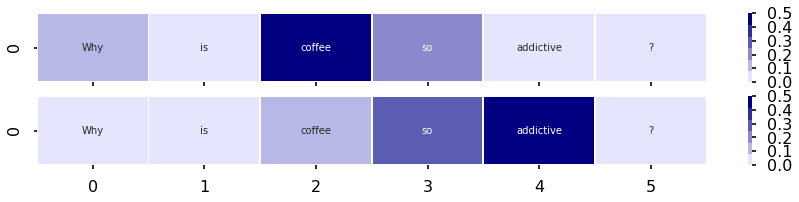

------------------------------
What are your most favorite meals ?
8


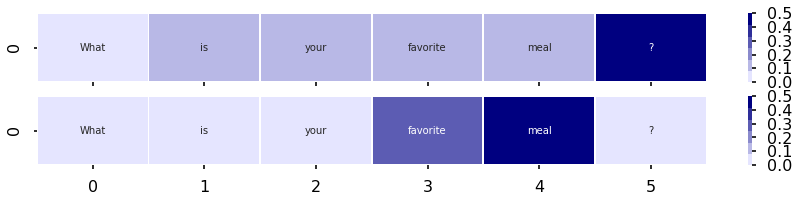

------------------------------
Are Apple products overrated and overpriced ?
8


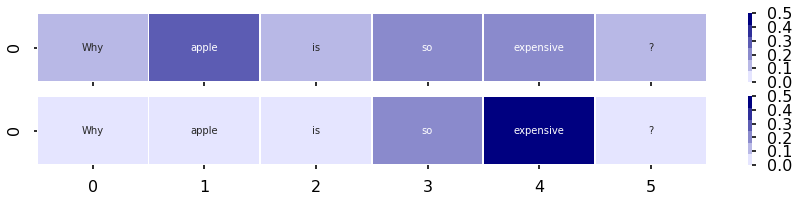

------------------------------
How do I get bigger overall ?
8


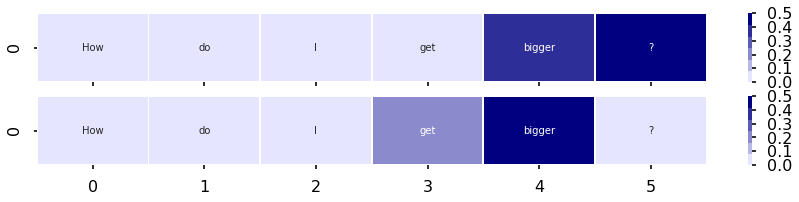

------------------------------
Why did it take so long for NASA to find water on Mars ?
8


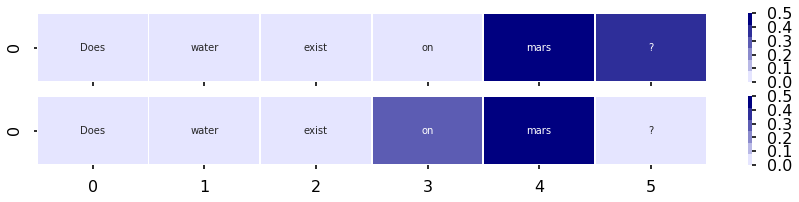

------------------------------
Why are some dogs considered carnivores ?
8


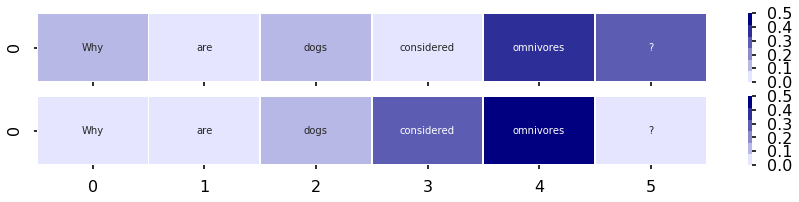

------------------------------
What does the ranking of the university really mean ?
8


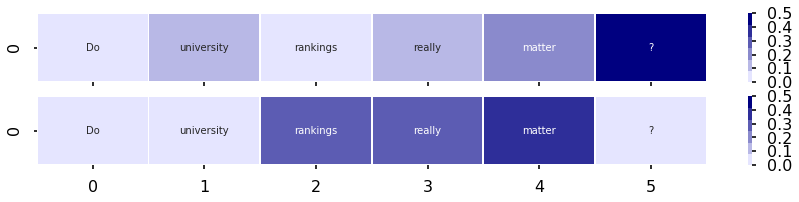

------------------------------
Why is a surgical strike named so ?
8


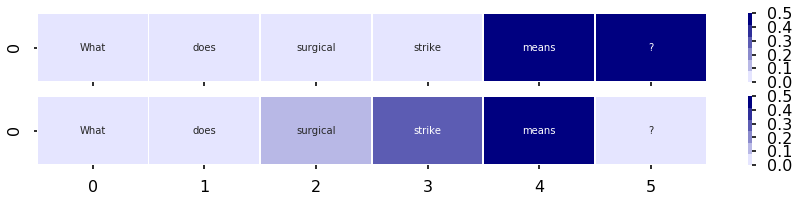

------------------------------
How can one increase and improve his IQ ?
8


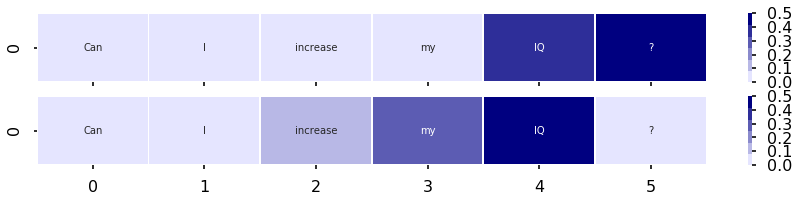

------------------------------
What is the best way to make a friend ?
8


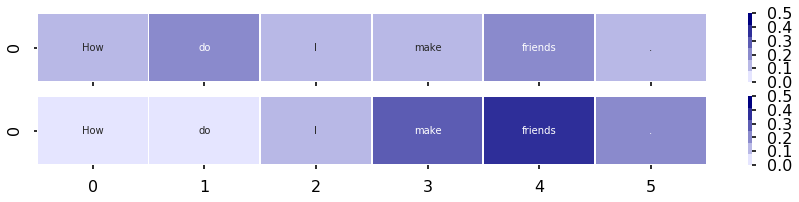

------------------------------
How children develop literacy ?
8


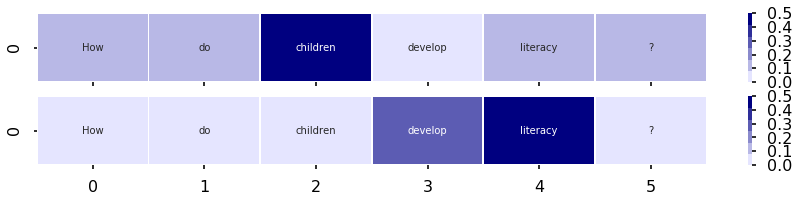

------------------------------
What are some tips for someone just starting to learn Hebrew ?
8


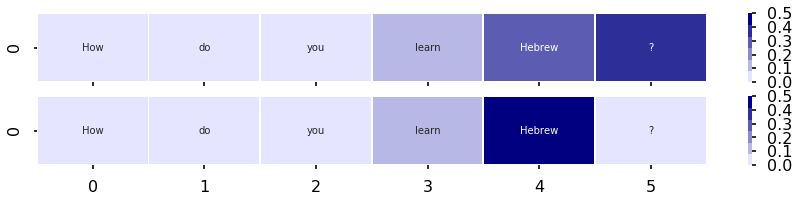

------------------------------
Are primary psychopaths born or made ?
8


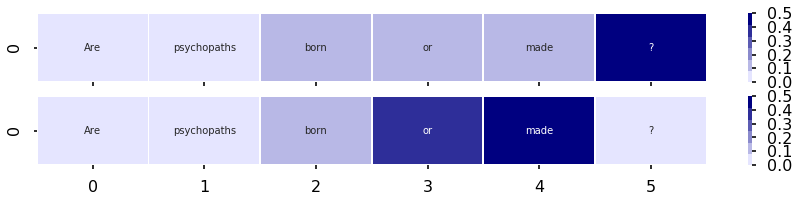

------------------------------
Is it possible to time travel to past ?
8


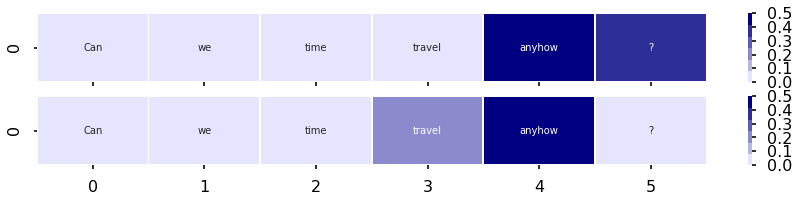

------------------------------
How do I stop being so <UNK> ?
8


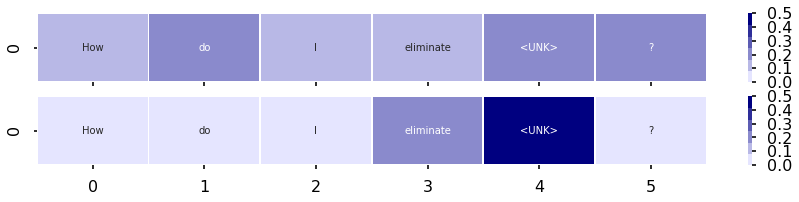

------------------------------
How does an electrical tester works ?
8


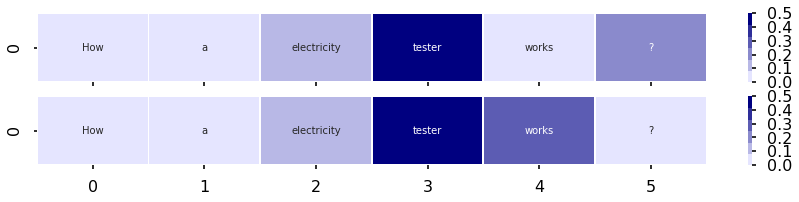

------------------------------
How can I study faster and more efficiently ?
8


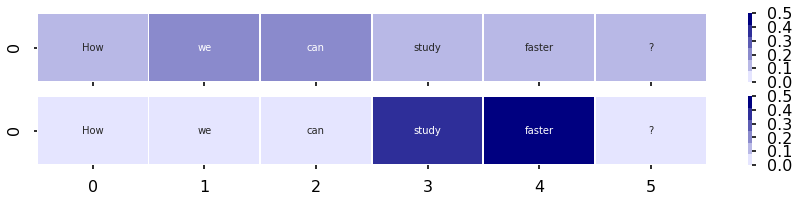

------------------------------
How soon is world war III ?
8


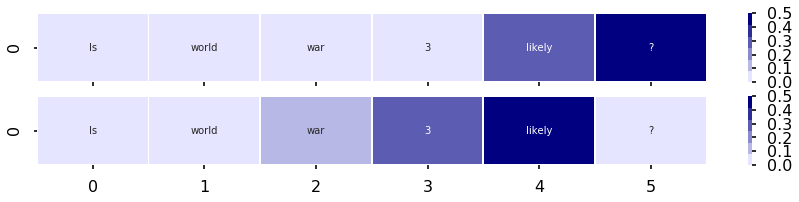

------------------------------
Which is your favourite painting and why ?
8


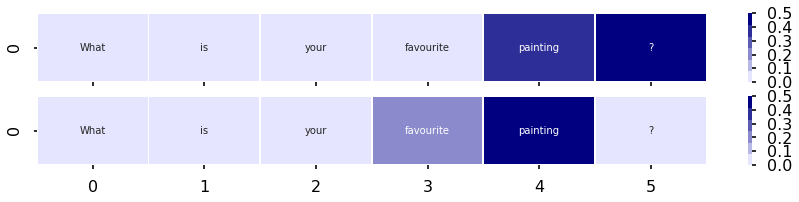

------------------------------
Is there any way to achieve immortality ?
8


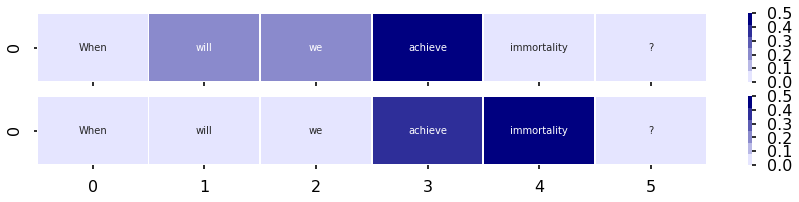

------------------------------
Can we ever know if there is life after death ?
8


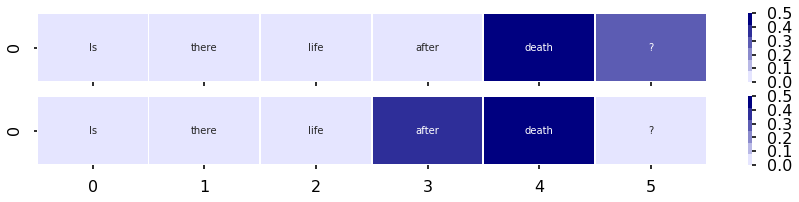

------------------------------
Which is easier to clear : IELTS or PTE to get work VISA ?
8


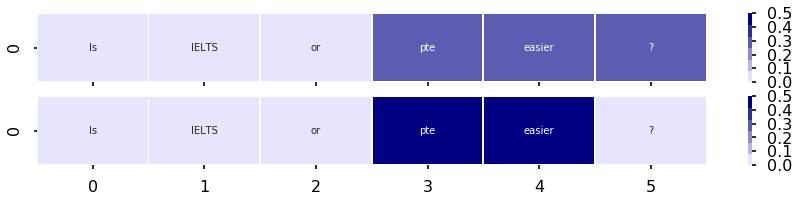

------------------------------
Does masturbation affect bodybuilding or muscle growth ?
8


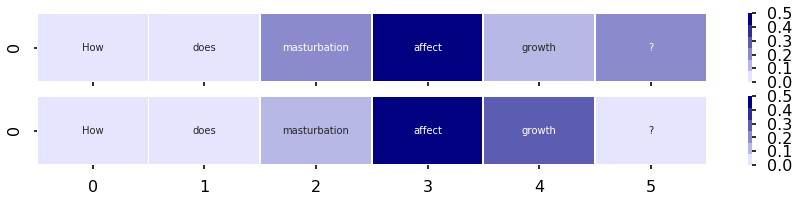

------------------------------
Do multivitamins work ?
8


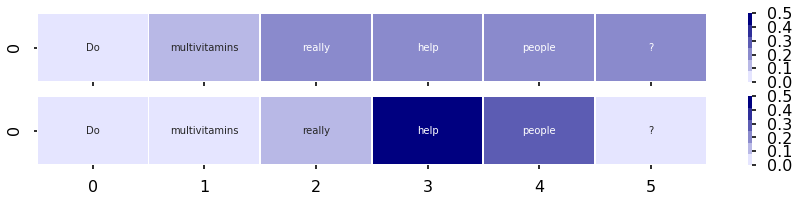

------------------------------
What is call centre ?
8


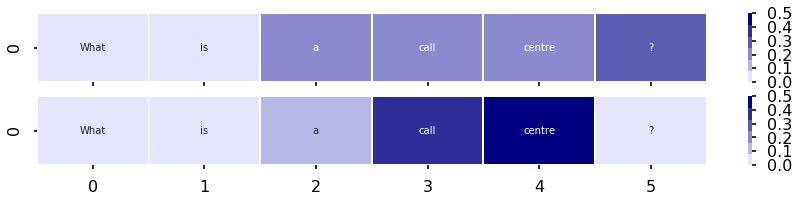

------------------------------
What is the best super power ?
8


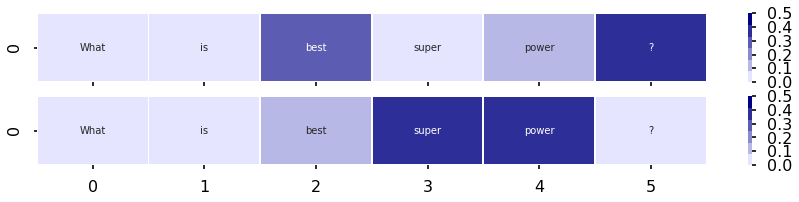

------------------------------
What was the Manhattan project ? What were some of the effects ?
8


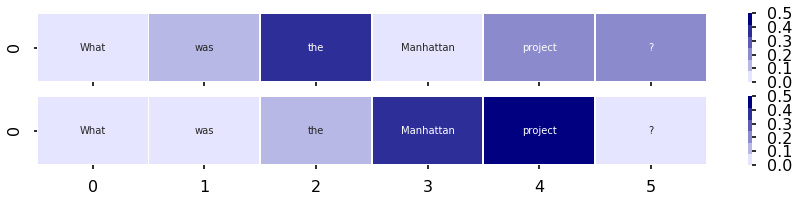

------------------------------
What are some good ways to lose weight ?
8


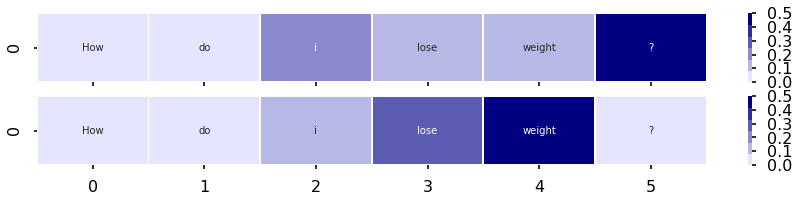

------------------------------
What happens to us when we die ?
8


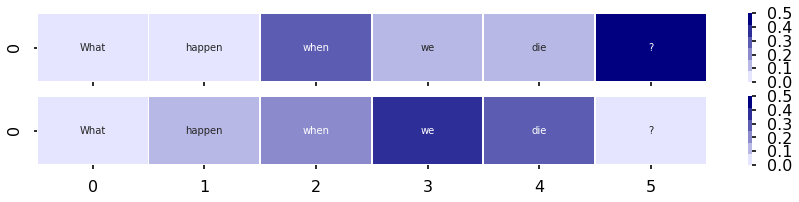

------------------------------
Do distance relationships work ? How can you make it work ?
8


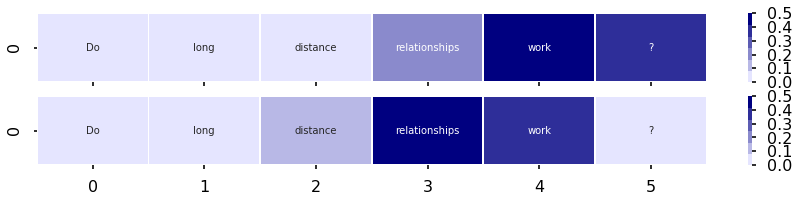

------------------------------
Where does all our waste go ?
8


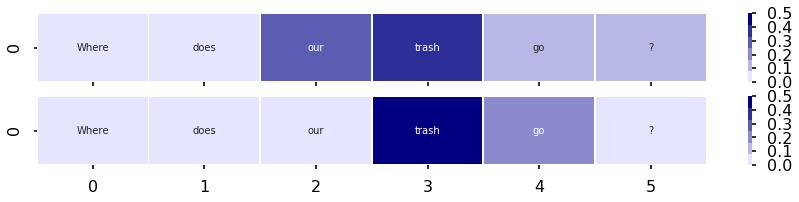

------------------------------
How are humans different from other animal species ?
8


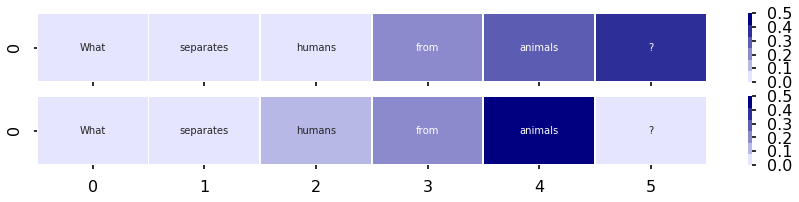

------------------------------
How do I make money from a YouTube channel ?
8


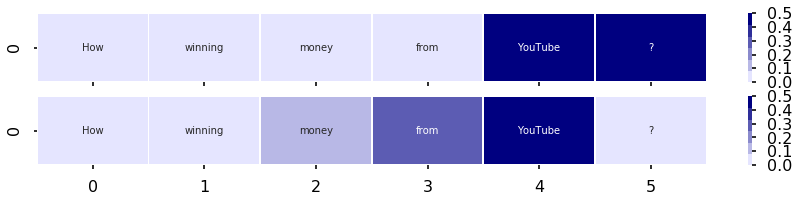

------------------------------
Why is incest considered bad and taboo ?
8


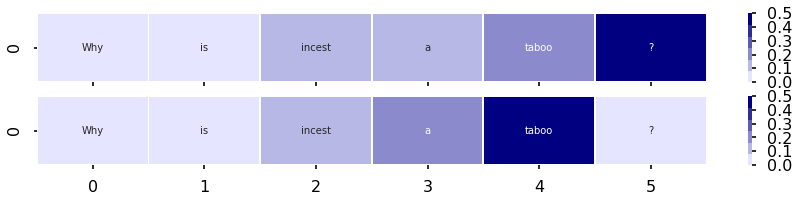

------------------------------
Which nationalities are the friendliest ?
8


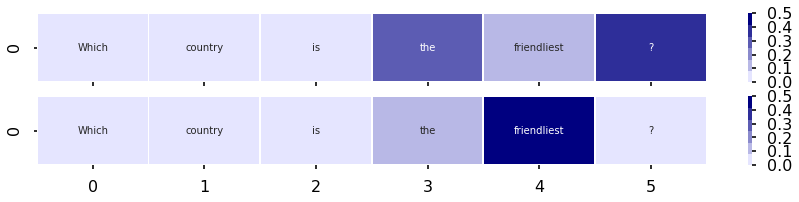

------------------------------
Do animals understand emotions ?
8


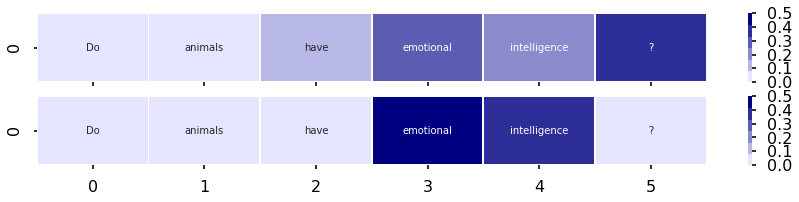

------------------------------
Which is the best book you have ever read ?
8


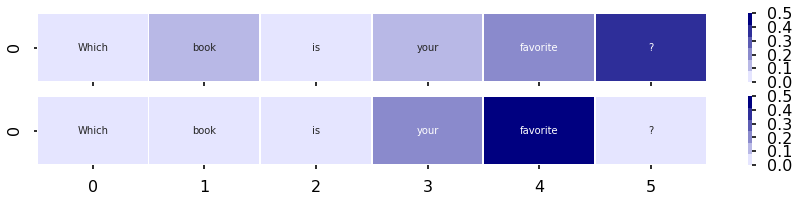

------------------------------
How can I earn money through YouTube ?
8


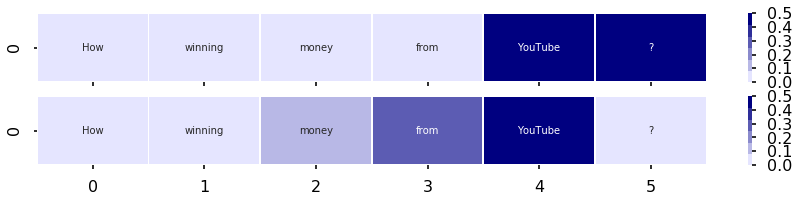

------------------------------
I am ugly and fat , how to lose weight ?
8


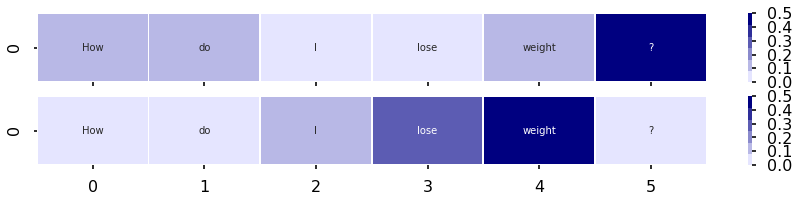

------------------------------
What is best way to read book ? And which book is good for me ?
8


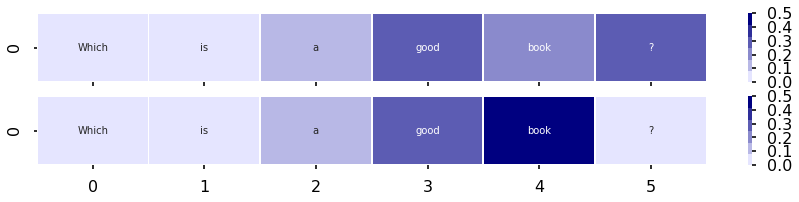

------------------------------
Why is quora so addictive ?
8


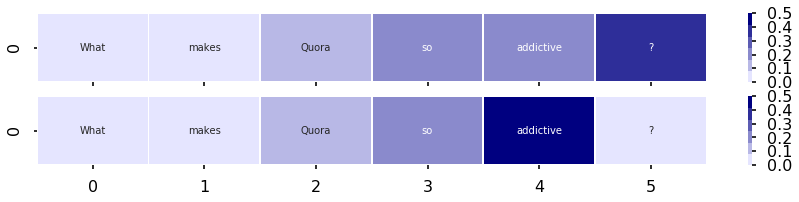

------------------------------
What exactly a debit card ?
8


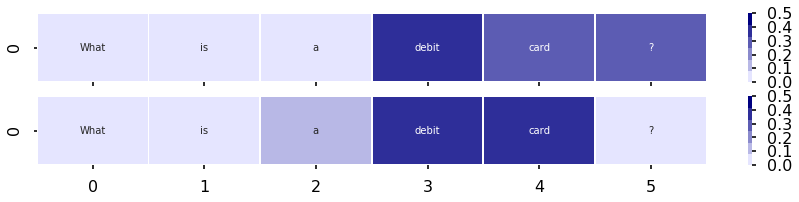

------------------------------
How can I get rid of insomnia ?
8


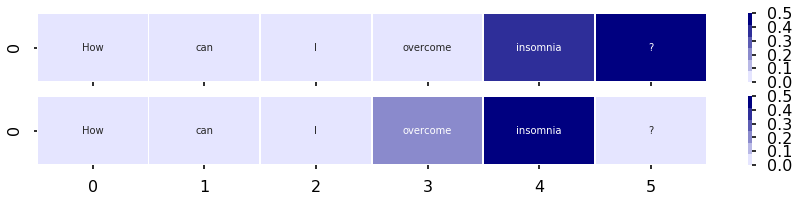

------------------------------
What makes an interesting villain ?
8


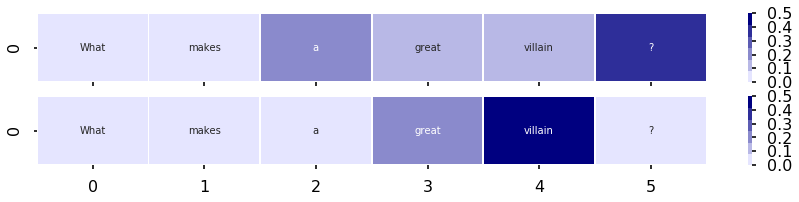

------------------------------
Does the EM Drive work ?
8


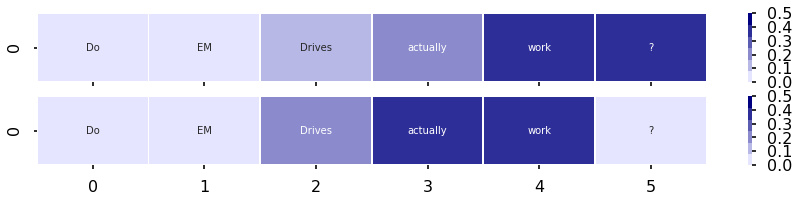

------------------------------
How can I become rich man ?
8


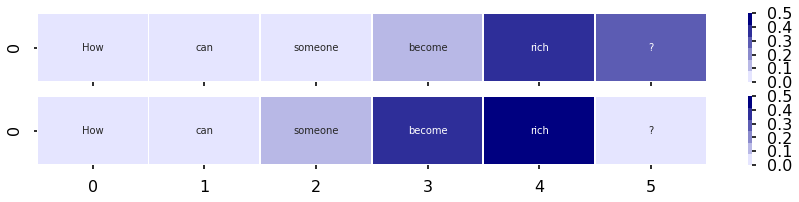

------------------------------
Who has inspired you the most ?
8


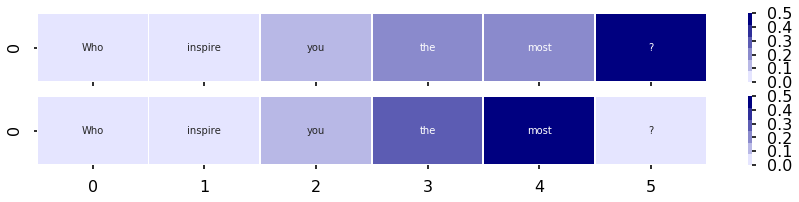

------------------------------
What is PPF account ?
8


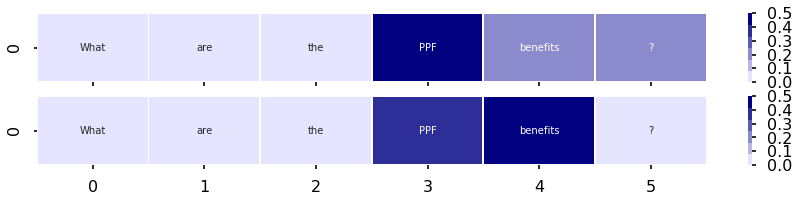

------------------------------
What do ISIS want , what is their ideal philosophy ?
8


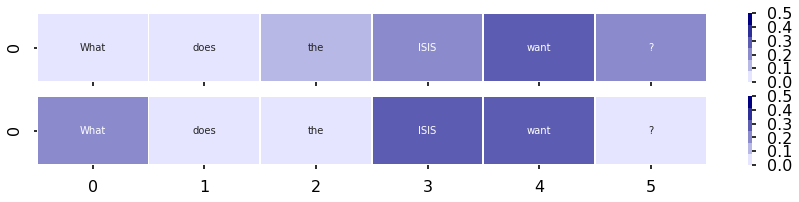

------------------------------
How can I understand surface tension ?
8


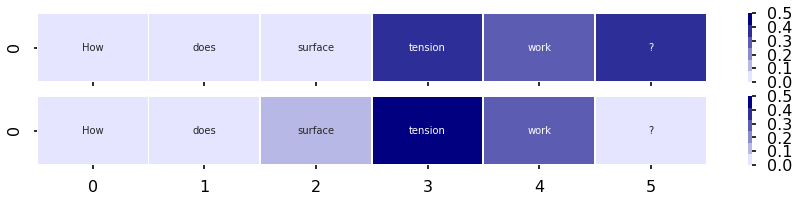

------------------------------
Have you been raped ?
8


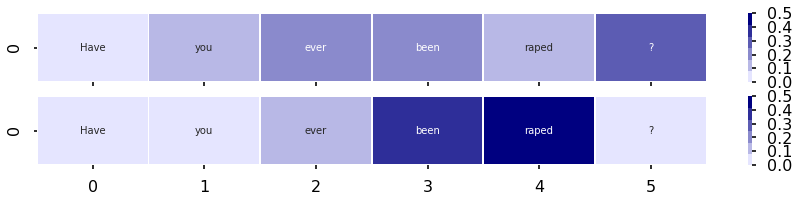

------------------------------
What are flaws in human nature ?
8


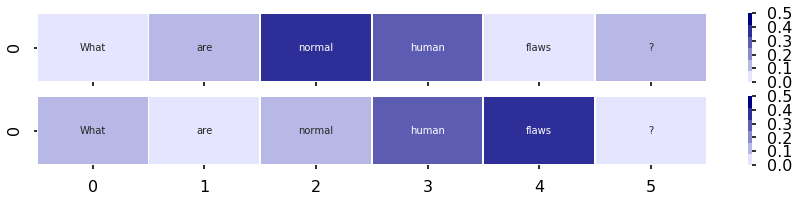

------------------------------
How can I read more quickly ?
8


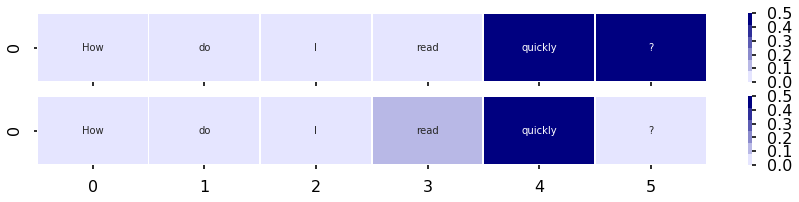

------------------------------
What is your favorite vodka drink and why ?
8


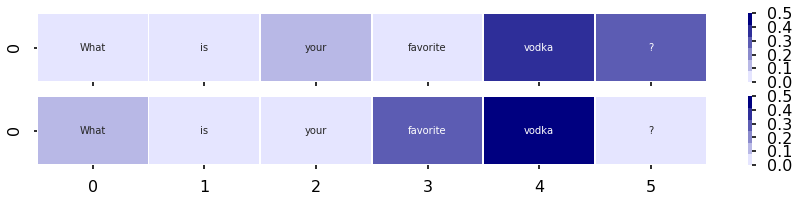

------------------------------
Which is your favourite song and why ?
8


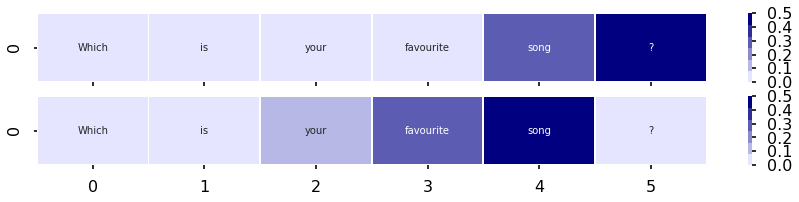

------------------------------
Why sex important in our life ?
8


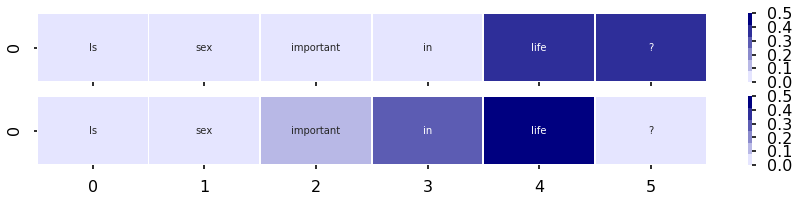

------------------------------
How is work culture ?
8


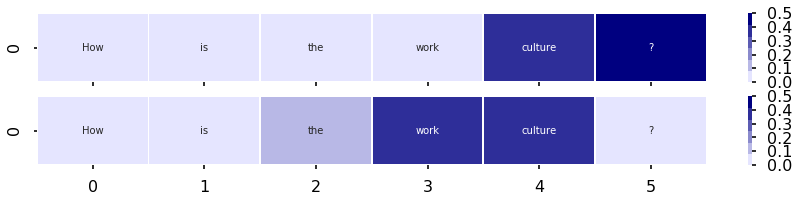

------------------------------
What is a binary compound ? What are some examples ?
8


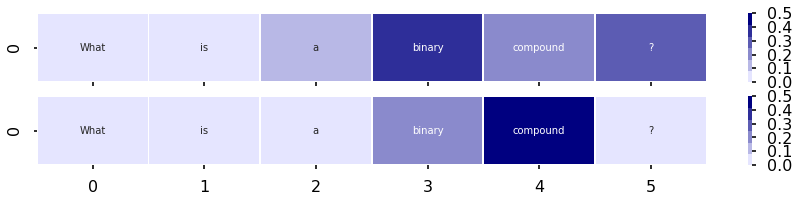

------------------------------
Does weed give you lung cancer ?
8


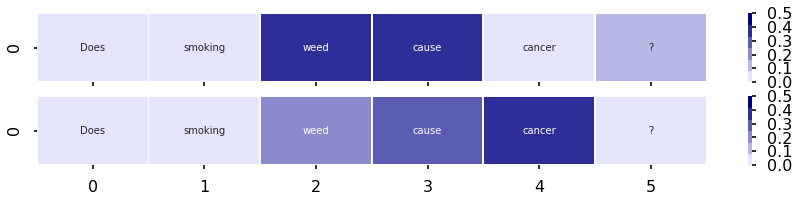

------------------------------
How can we solve racism ?
8


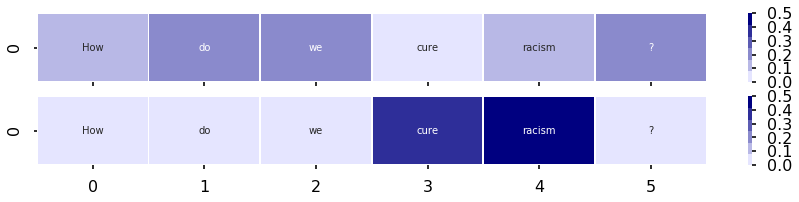

------------------------------
How should I learn faster ?
8


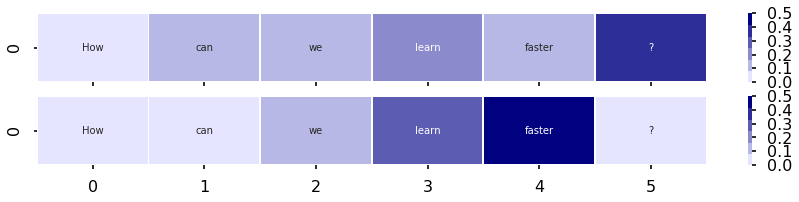

------------------------------
How can I reduce my weight and tummy ?
8


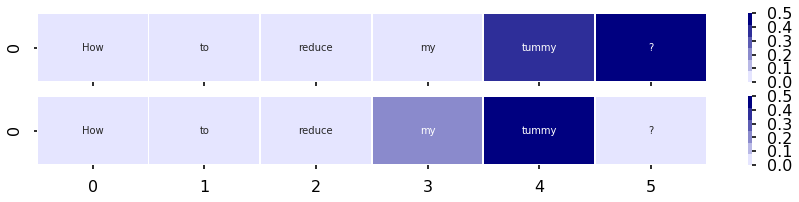

------------------------------
Which Are Some Best Bollywood movies ?
8


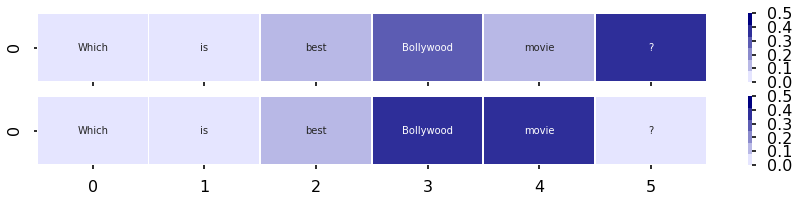

------------------------------
Has Quora turned into a political hack for Clinton ?
8


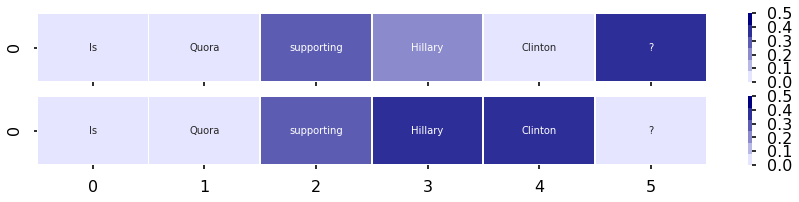

------------------------------
What can we do to smile more often ?
8


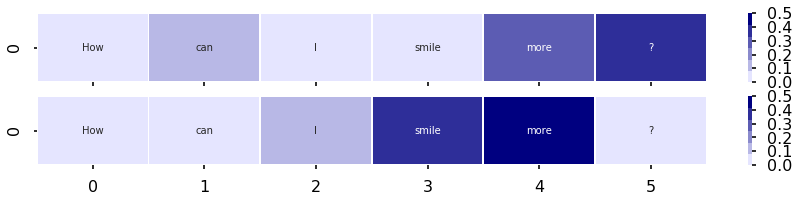

------------------------------
How do I deal with uncertainty ?
8


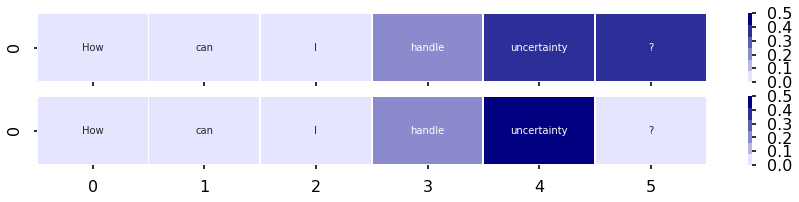

------------------------------
How do airline pilots handle turbulence ?
8


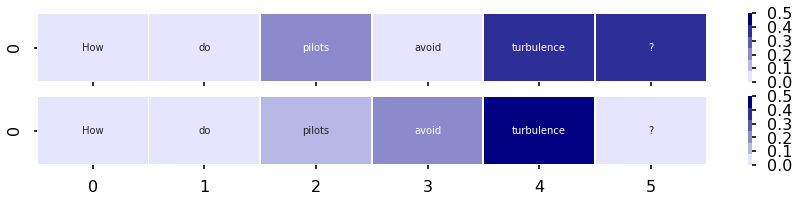

------------------------------
What would be a realistic plan to lose weight ?
8


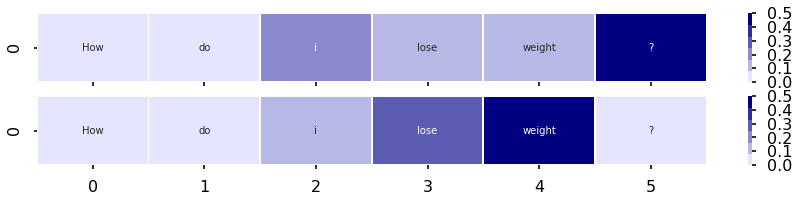

------------------------------
What should I do to sing better ?
8


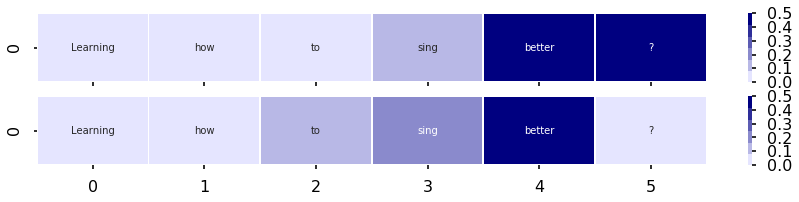

------------------------------
Why are some people so stupid ?
8


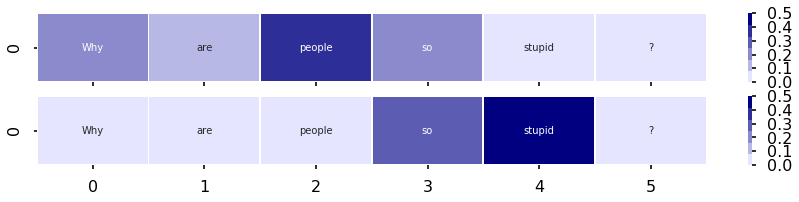

------------------------------
In your opinion , is education worth it ?
8


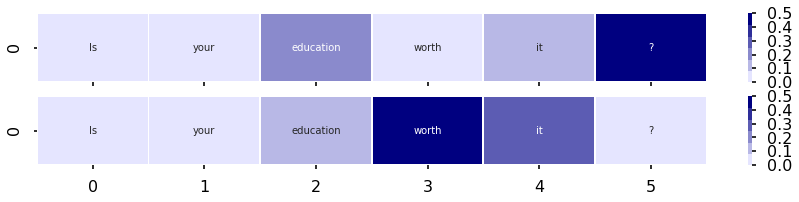

------------------------------
What has Hillary Clinton actually accomplished in her political career ?
8


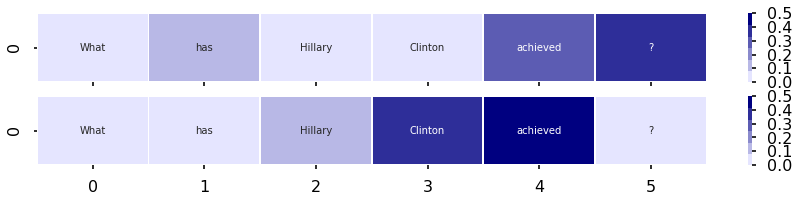

------------------------------
Which is your favourite anime and why ?
8


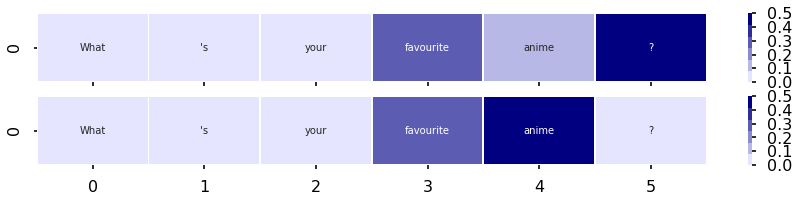

------------------------------
What does it take for a successful long distance relationship ?
8


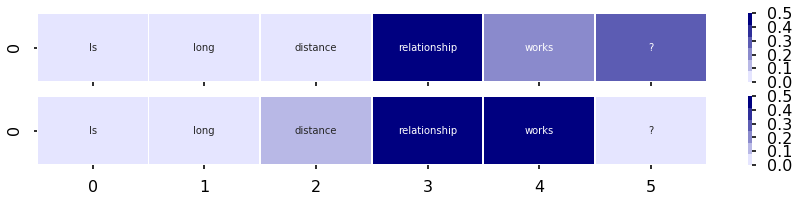

------------------------------
What did you learn from Naruto ?
8


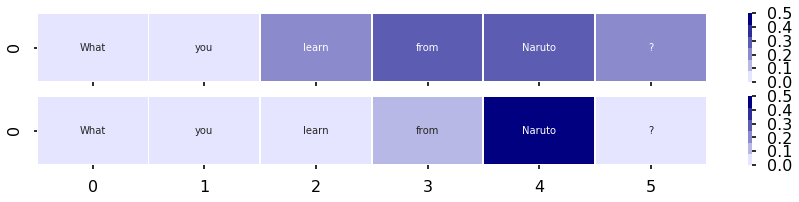

------------------------------
Why does it seem Quora is so Pro Clinton ?
8


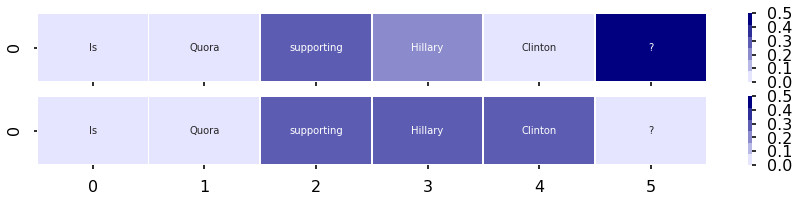

------------------------------
What is the purpose of studying physics ?
8


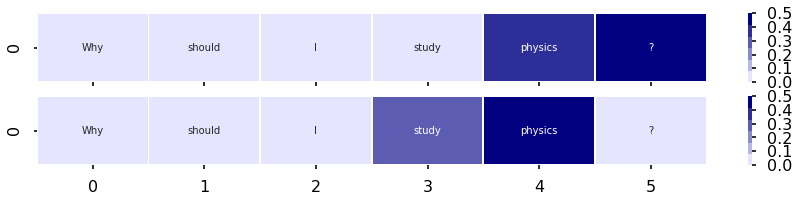

------------------------------
What are the best quotes by anyone ?
8


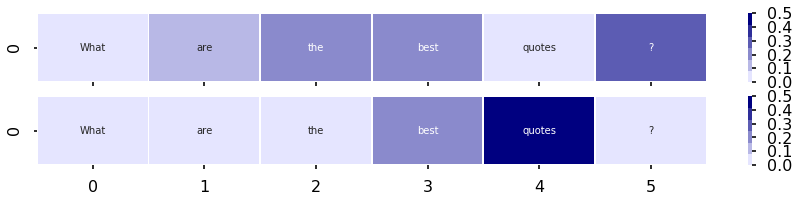

------------------------------
How do you memorize faster for my exam tomorrow ?
8


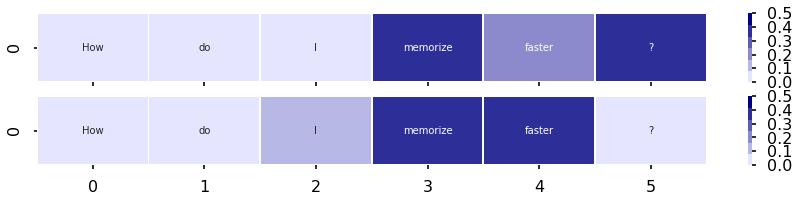

------------------------------
What are some great podcasts ?
8


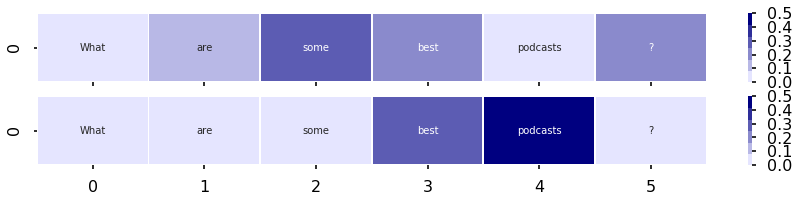

------------------------------
Why is the iPhone 6 so expensive ?
8


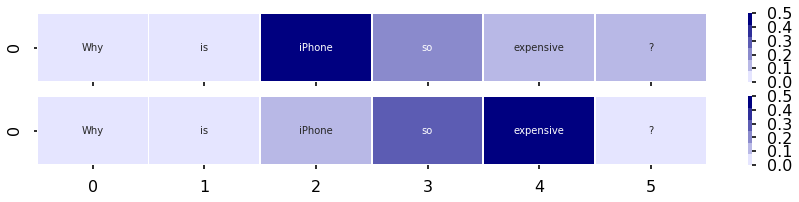

------------------------------
Which brand has a good multivitamin ?
8


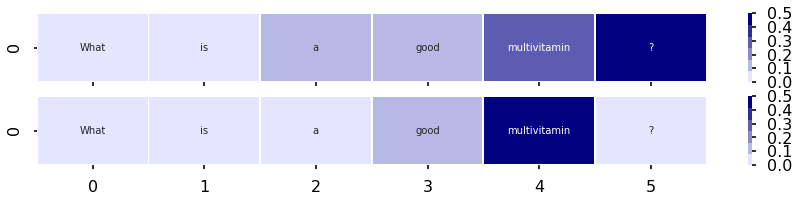

------------------------------
Gay marriage is acceptable ?
8


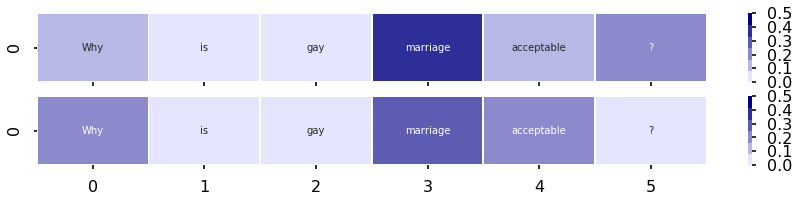

------------------------------
What exactly is light made of ?
8


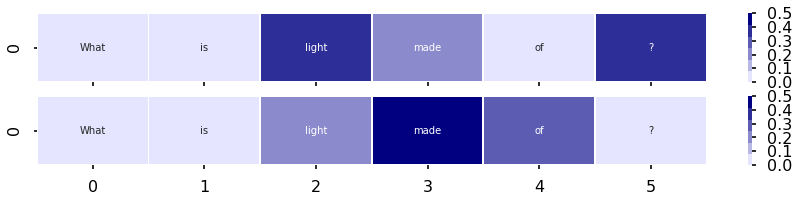

------------------------------
Do women really enjoy anal sex ?
8


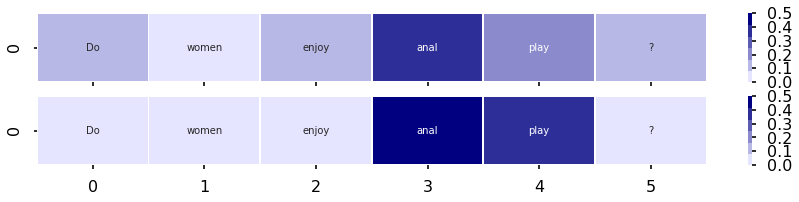

------------------------------
What are some good ways to manage money ?
8


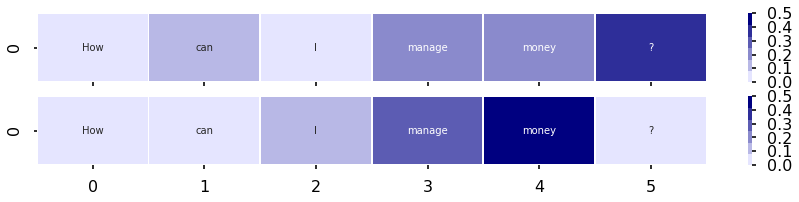

------------------------------
What is sensex all about and how to understand the stock market ?
8


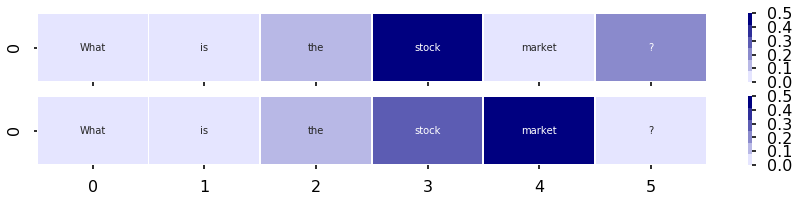

------------------------------
Can a US president pardon himself on his last day ?
8


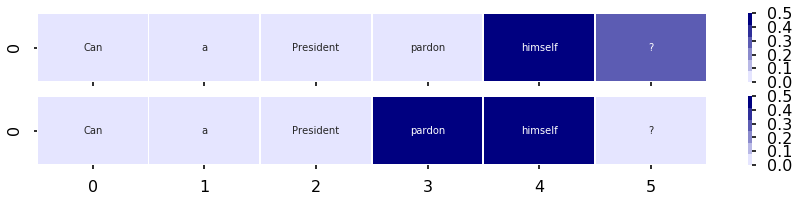

------------------------------
What are the best ways to <UNK> urine ?
8


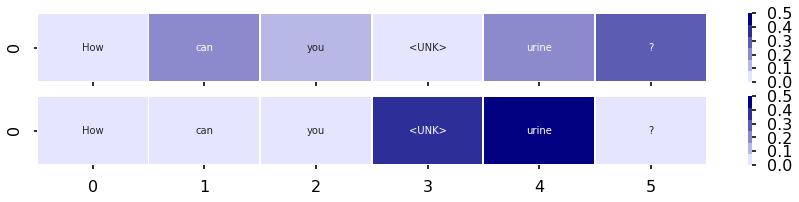

------------------------------
Why do people become an eccentric ?
8


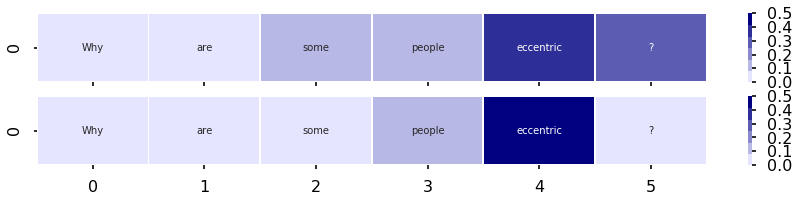

------------------------------
What is the best bollywood movie ever ?
8


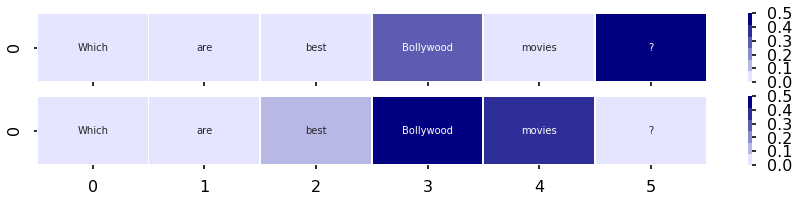

------------------------------
Are dynamic <UNK> of array allowed in C ?
8


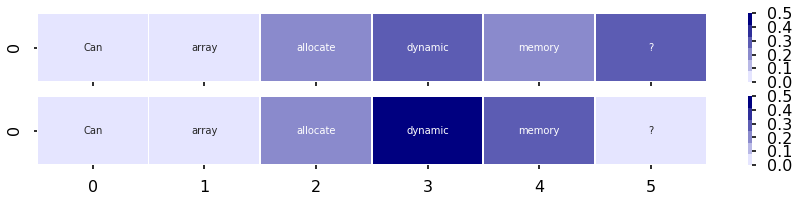

------------------------------
Do women like oral sex ?
8


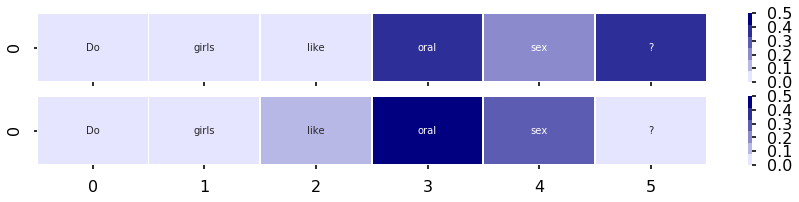

------------------------------
What 's your favorite subject in school ?
8


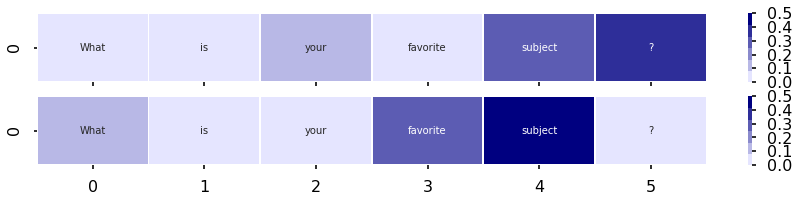

------------------------------
Is there any ghosts in real life ?
8


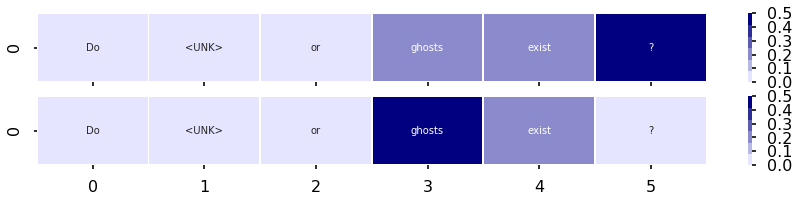

------------------------------
Is there any need for reservation in India ?
8


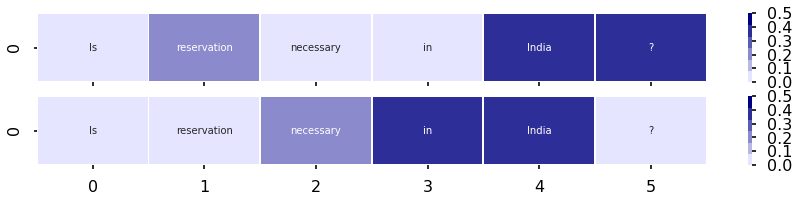

------------------------------
Why does champagne bubble ?
8


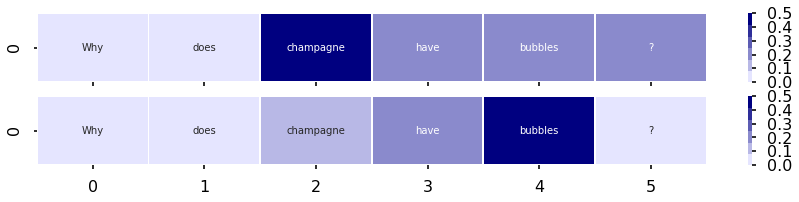

------------------------------
What is your favorite book , why ?
8


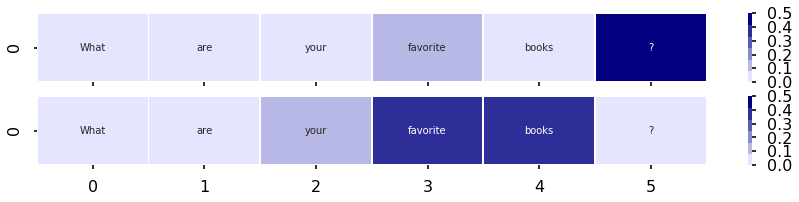

------------------------------
Why do girls wear makeup ?
8


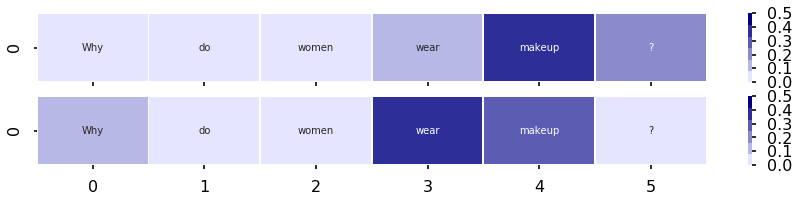

------------------------------
Is there any easy way to make money online ?
8


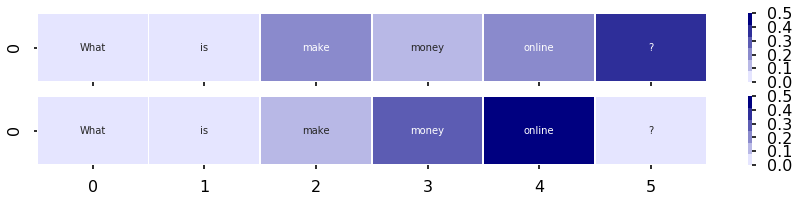

------------------------------
How can one overcome procrastination ?
8


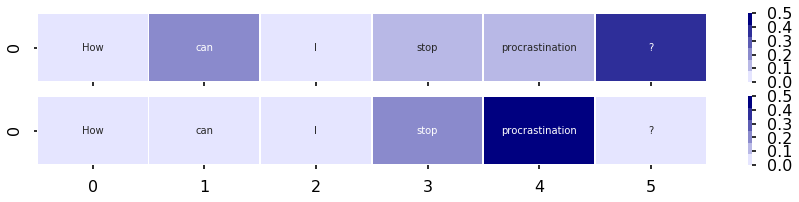

------------------------------
Is Jayalalithaa alive ?
8


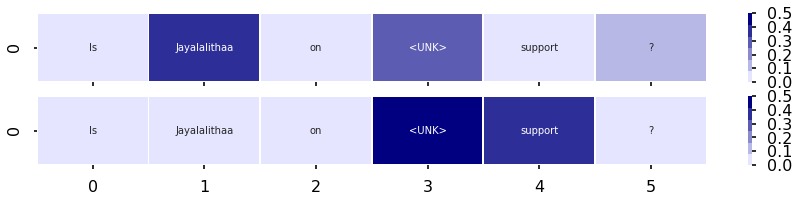

------------------------------
What is the Deep Web ?
8


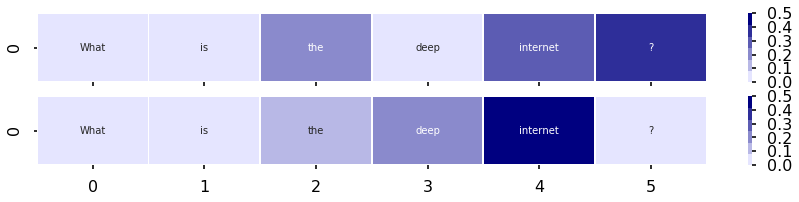

------------------------------
Why is China so rich ?
8


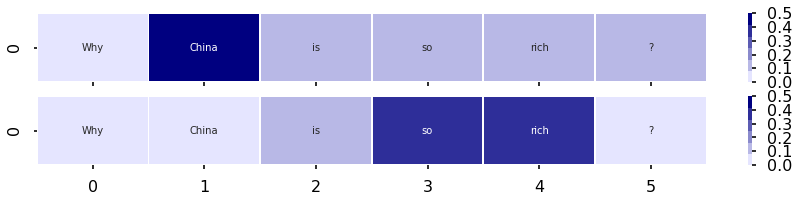

------------------------------
How can chiropractic help allergies ?
8


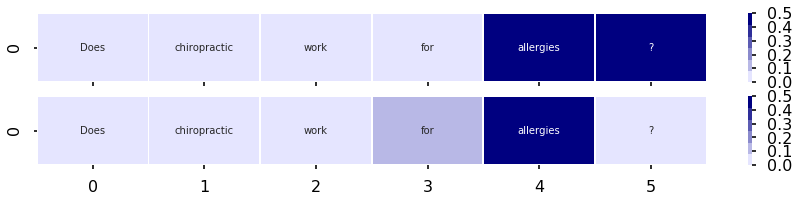

------------------------------
What 's your favorite drink ?
8


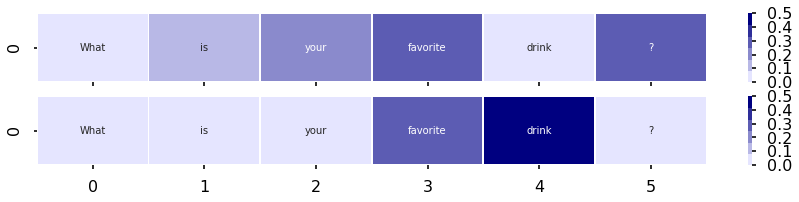

------------------------------
Who keeps you inspired ?
8


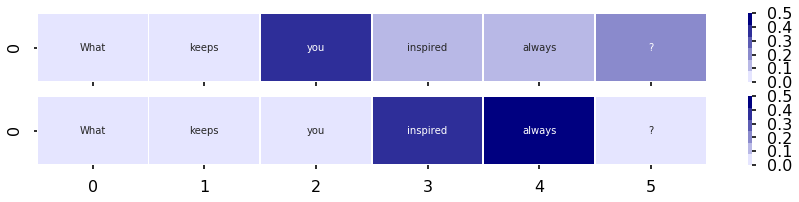

------------------------------
Can dogs eat bananas ? What about the peels ?
8


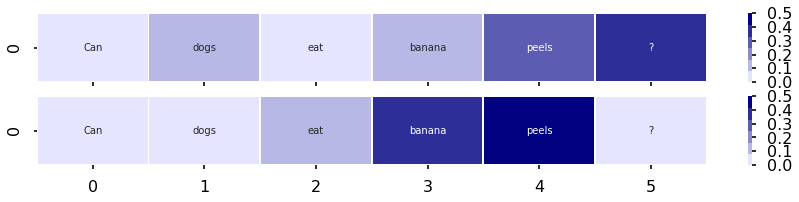

------------------------------
What happens to our body after we die ?
8


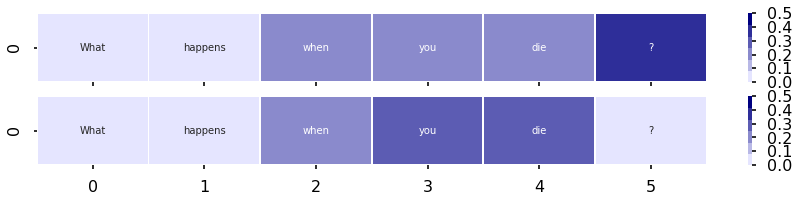

------------------------------
What age is considered senior citizen ?
8


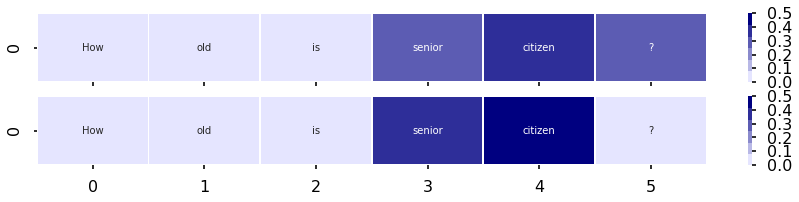

------------------------------
How can I improve fluency in English ?
8


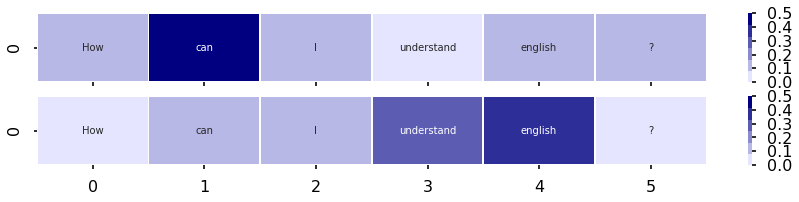

------------------------------
How can I study smartly ?
8


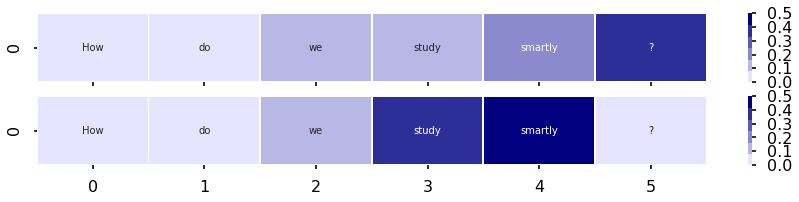

------------------------------
Will humans go extinct ?
8


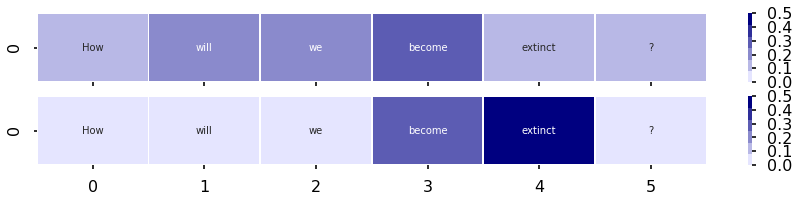

------------------------------
How can I earn money easily online ?
8


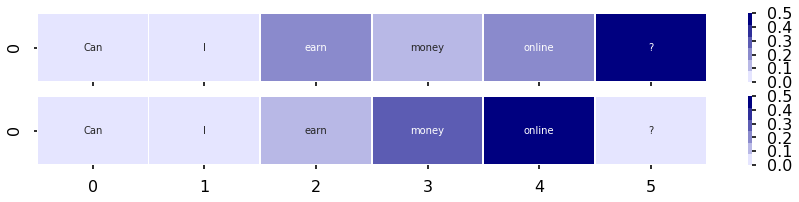

------------------------------
Where and how do the crop circles get generated ?
8


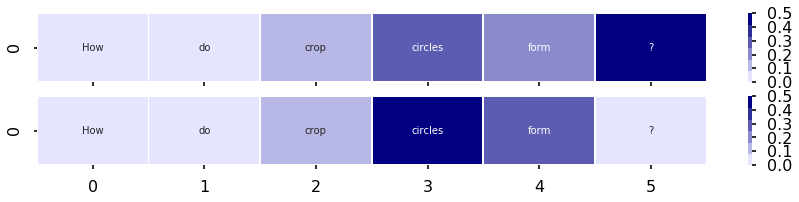

------------------------------
How can I fall asleep fast ?
8


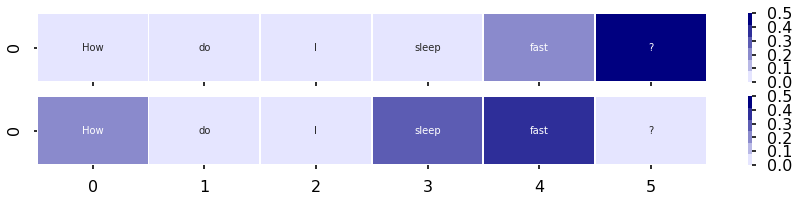

------------------------------
Does Quora support Hillary Clinton ?
8


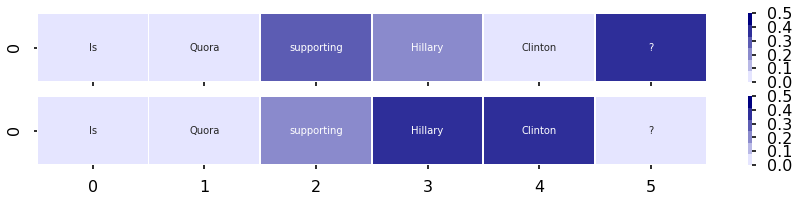

------------------------------
Why we need study ?
8


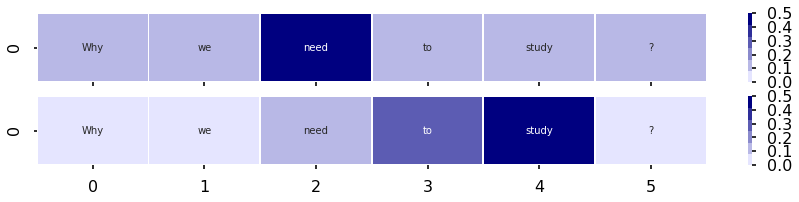

------------------------------
How do I survive in a long distance relationship ?
8


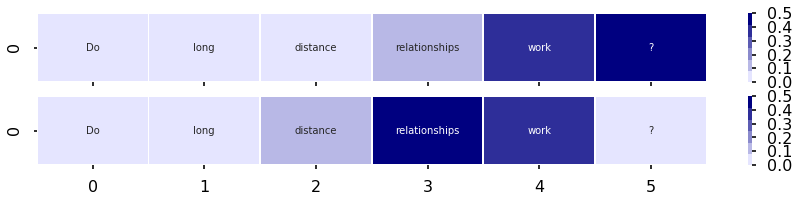

------------------------------
Why do people study physics ?
8


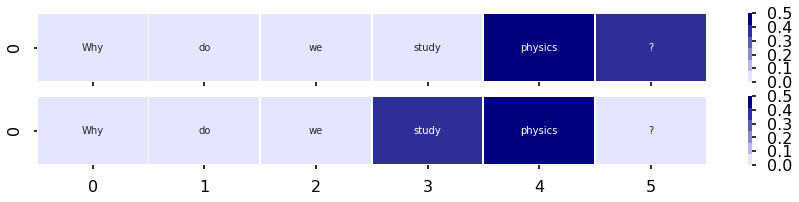

------------------------------
How can I reduce tummy fat ?
8


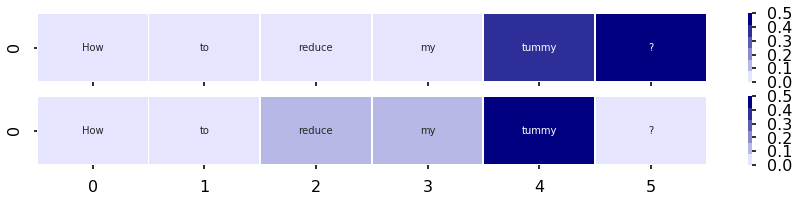

------------------------------
How can we read someone 's mind ?
8


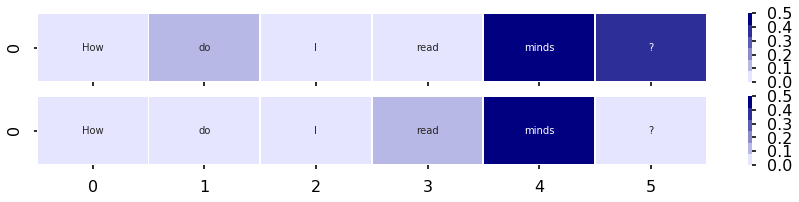

------------------------------
How can people stop daydreaming ?
8


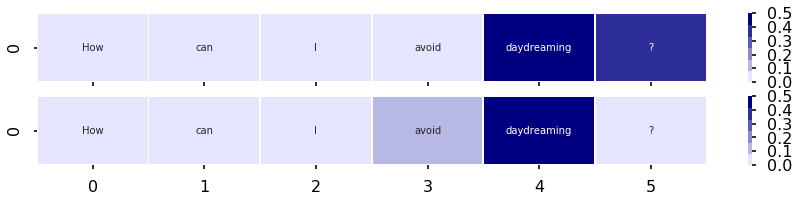

------------------------------
What 's the time just now ?
8


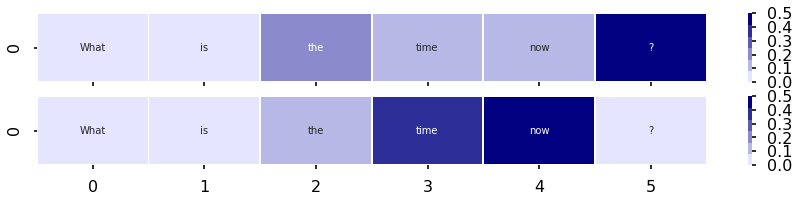

------------------------------
How do I control my anxiety ?
8


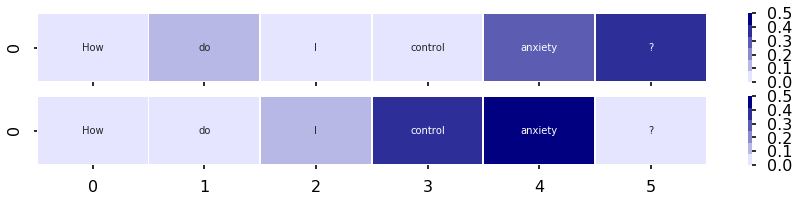

------------------------------
What is ultimate happiness for you ?
8


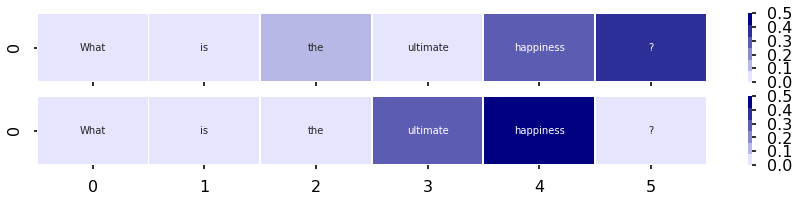

------------------------------
How do I get money easily ?
8


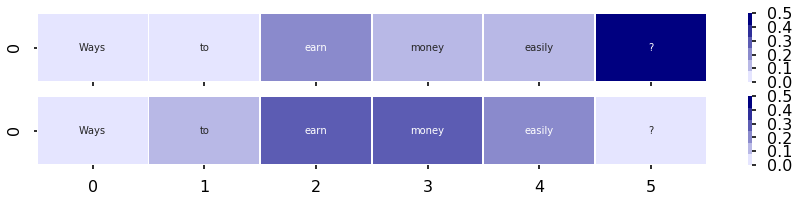

------------------------------
Is there any way that <UNK> which my height will increase ?
8


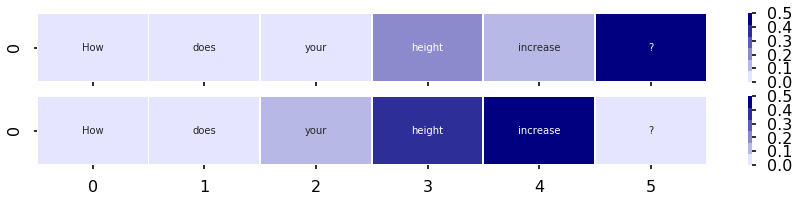

------------------------------
What makes up a perfect answer ?
8


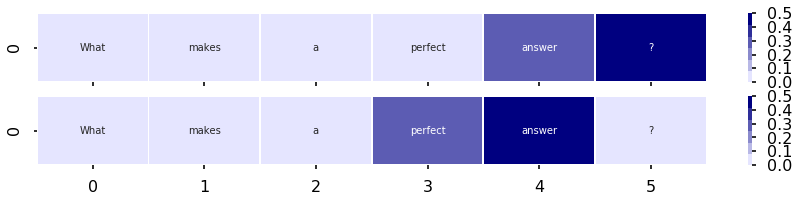

------------------------------
Will we ever become immortal ?
8


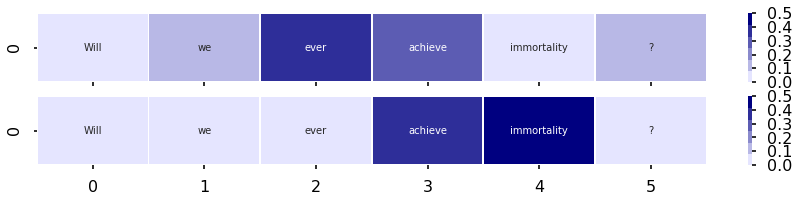

------------------------------
Are we getting closer to world war 3 ?
8


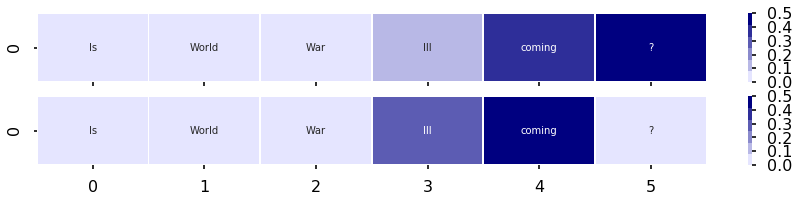

------------------------------
What are the ways to regain one 's self confidence ?
8


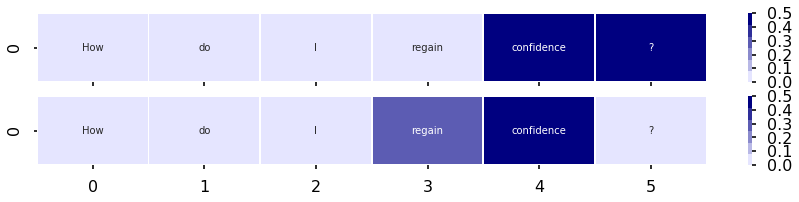

------------------------------
What are some of the best ways to memorize things faster ?
8


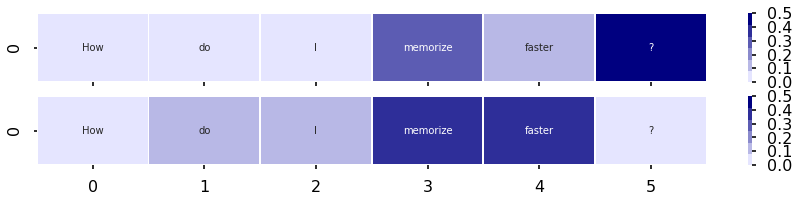

------------------------------
Why is a surgical strike named so ?
8


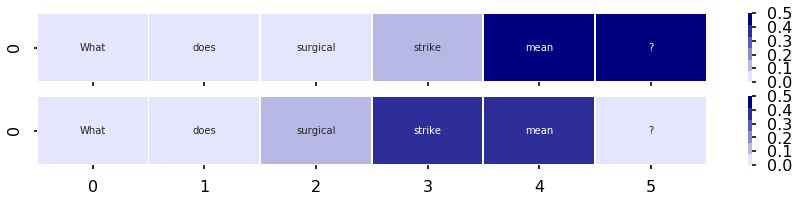

------------------------------
Are any UFO sightings real ?
8


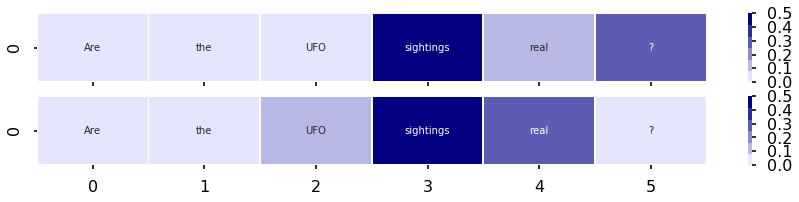

------------------------------
What is a common man ?
8


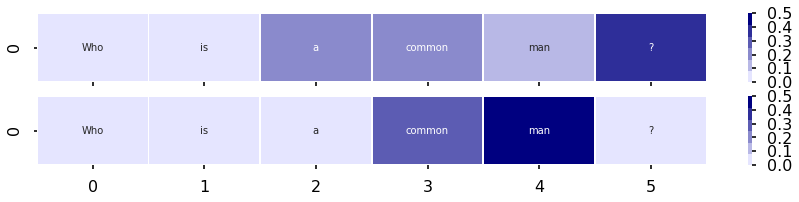

------------------------------
Do women like pegging ?
8


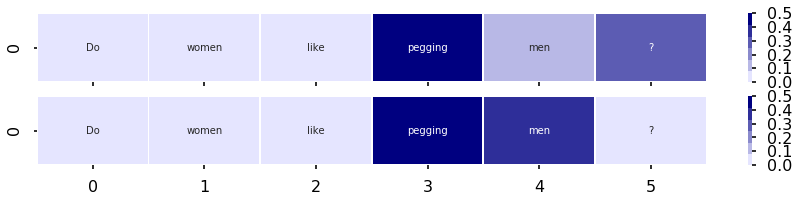

------------------------------
When will time travelling ( or at least time shifted vision ) finally be possible ?
8


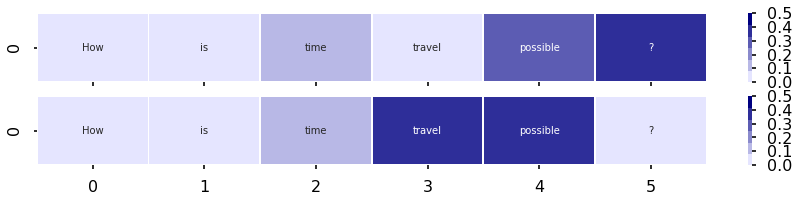

------------------------------
How can I increase my IQ to 180 ?
8


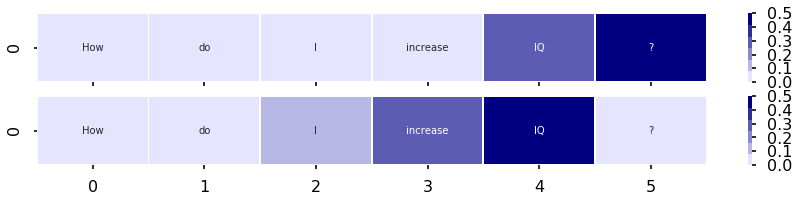

------------------------------
Cropping saved pngs
Done cropping


In [6]:
output1 = get_outputs(base_dir1)
output2 = get_outputs(base_dir1)
output3 = get_outputs(base_dir3)

# 0=> inaccurate question

count = print_attention_2(output1,output2, output3, max=250, plot=True, output_filter=1, jsd_thresh=0.3)


In [ ]:
# count = print_attention_2(output1,output2, output3, max=50, plot=True, output_filter=0, jsd_thresh=0.3)